# KPMG Virtual Internship 
## Module 2

Sprocket Central Pty Ltd. is a long standinhg KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Sprocket Central Pty Ltd has given us a new list of 1000 potential customers with their demographics and attributes. However, these customers do not have prior transaction history with the organisation. 

The marketing team at Sprocket Central Pty Ltd is sure that, if correctly analysed, the data would reveal useful customer insights which could help optimise resource allocation for targeted marketing. Hence, improve performance by focusing on high value customers.

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 
Data sets available to us are:

- Transactions data in the past 3 months
- Customer Demographics
- Customer Addresses
- New Customer List
- Correspondence, 2017 Postcode to 2016 Remoteness Area 

#### *Objective : To recommend which of the customers among 1000 new customers should be targeted to drive the most value for the organisation*

## *Step 1 : Data Preprocessing and Exploration*

### *Importing necessary libraries :*

In [1]:
import pandas as pd #--For Data Analysis
import numpy as np #--For Numeric Calculation
import seaborn as sns #--For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import math #--For Mathematical Calculations
from datetime import datetime, date #--For working with dates
from sklearn.model_selection import train_test_split #--Split the data in train and test set
from sklearn.cluster import KMeans #--Fit a model using KMeans
import statsmodels.api as sm #--Fit OLS Model
from sklearn.neighbors import KNeighborsClassifier #--Fit a model using KNN
from sklearn.tree import DecisionTreeClassifier #--Fit a model using Decision Tree Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #--Metrics for fitted models
from sklearn.preprocessing import LabelEncoder, StandardScaler #--Label Encoding the category columns
import warnings #--Ignoring the warnings
warnings.filterwarnings('ignore')

### *Data - Meet and Greet :*

#### *1.) Transaction Data:*

In [2]:
df_trans = pd.read_excel("C:/Users/dhrit/Downloads/KPMG_VI_New_raw_data_update_final.xlsx",header=1,
                   sheet_name = "Transactions",index_col=0)
df_trans = df_trans.sort_values('customer_id')
df_trans.head()

product_id  customer_id transaction_date  online_order  \
transaction_id                                                           
14486                   23            1       2017-03-27           0.0   
18970                   11            1       2017-03-29           1.0   
16423                    9            1       2017-12-09           1.0   
5157                    47            1       2017-05-11           1.0   
13424                    2            1       2017-02-21           0.0   

               order_status           brand product_line product_class  \
transaction_id                                                           
14486              Approved  Norco Bicycles     Mountain           low   
18970              Approved  Giant Bicycles     Standard          high   
16423              Approved      OHM Cycles         Road        medium   
5157               Approved   Trek Bicycles         Road           low   
13424              Approved           Solex     Standard        medium   

               product_size  list_price  standard_cost  \
transaction_id                                           
14486                 small      688.63         612.88   
18970                medium     1274.93         764.96   
16423                medium      742.54         667.40   
5157                  small     1720.70        1531.42   
13424                medium       71.49          53.62   

                product_first_sold_date  
transaction_id                           
14486                           33455.0  
18970                           35378.0  
16423                           37838.0  
5157                            37823.0  
13424                           38573.0

In [3]:
## For "Transcations" data :
df_trans.shape

(20000, 12)

In [4]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 14486 to 17469
Data columns (total 12 columns):
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 2.0+ MB


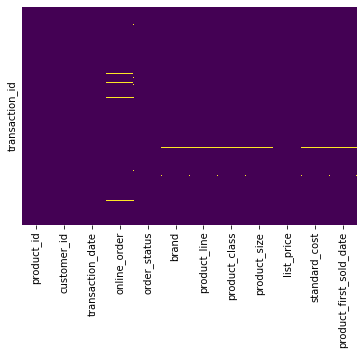

In [5]:
#Checking for null values:
sns.heatmap(df_trans.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df_trans.isnull().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In total, there are **1739** missing values in Transactions data.

In [7]:
## Filling the NA values in "Online Order" column of dataframe with the corresponding mode of this column:
df_trans['online_order'] = df_trans['online_order'].fillna(df_trans['online_order'].mode().iloc[0])

## Filling the NA values in "Brand" column of dataframe with the corresponding mode of this column:
df_trans['brand'] = df_trans['brand'].fillna(df_trans['brand'].mode().iloc[0])

## Filling the NA values in "Product Line" column of dataframe with the corresponding mode of this column:
df_trans['product_line'] = df_trans['product_line'].fillna(df_trans['product_line'].mode().iloc[0])

## Filling the NA values in "Product Class" column of dataframe with the corresponding mode of this column:
df_trans['product_class'] = df_trans['product_class'].fillna(df_trans['product_class'].mode().iloc[0])

## Filling the NA values in "Product Size" column of dataframe with the corresponding mode of this column:
df_trans['product_size'] = df_trans['product_size'].fillna(df_trans['product_size'].mode().iloc[0])

## Filling the NA values in "Standard Cost" column of dataframe with the corresponding median of this column:
df_trans['standard_cost'] = df_trans['standard_cost'].fillna(df_trans['standard_cost'].median())

## Filling the NA values in "Product First Sold Date" column of dataframe with the corresponding median of this column:
df_trans['product_first_sold_date'] = df_trans['product_first_sold_date'].fillna(df_trans['product_first_sold_date'].median())

In [8]:
df_trans.dtypes

product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

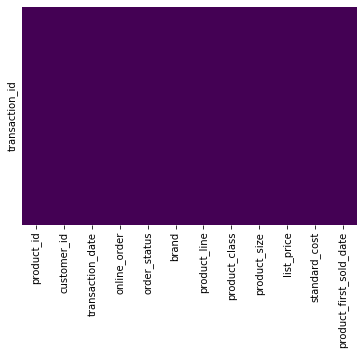

In [9]:
sns.heatmap(df_trans.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
## Converting "product_first_sold_date" to datetime format:

df_trans['product_first_sold_date'] = pd.to_datetime(df_trans['product_first_sold_date'])
df_trans.head(2)

product_id  customer_id transaction_date  online_order  \
transaction_id                                                           
14486                   23            1       2017-03-27           0.0   
18970                   11            1       2017-03-29           1.0   

               order_status           brand product_line product_class  \
transaction_id                                                           
14486              Approved  Norco Bicycles     Mountain           low   
18970              Approved  Giant Bicycles     Standard          high   

               product_size  list_price  standard_cost  \
transaction_id                                           
14486                 small      688.63         612.88   
18970                medium     1274.93         764.96   

                     product_first_sold_date  
transaction_id                                
14486          1970-01-01 00:00:00.000033455  
18970          1970-01-01 00:00:00.000035378

In [11]:
# Adding 'Profit' and 'Recency' columns to transaction data
df_trans['Profit'] = df_trans['list_price'] - df_trans['standard_cost']
df_trans['Recency'] = max(df_trans['transaction_date']) - df_trans['transaction_date']
df_trans.head()

product_id  customer_id transaction_date  online_order  \
transaction_id                                                           
14486                   23            1       2017-03-27           0.0   
18970                   11            1       2017-03-29           1.0   
16423                    9            1       2017-12-09           1.0   
5157                    47            1       2017-05-11           1.0   
13424                    2            1       2017-02-21           0.0   

               order_status           brand product_line product_class  \
transaction_id                                                           
14486              Approved  Norco Bicycles     Mountain           low   
18970              Approved  Giant Bicycles     Standard          high   
16423              Approved      OHM Cycles         Road        medium   
5157               Approved   Trek Bicycles         Road           low   
13424              Approved           Solex     Standard        medium   

               product_size  list_price  standard_cost  \
transaction_id                                           
14486                 small      688.63         612.88   
18970                medium     1274.93         764.96   
16423                medium      742.54         667.40   
5157                  small     1720.70        1531.42   
13424                medium       71.49          53.62   

                     product_first_sold_date  Profit  Recency  
transaction_id                                                 
14486          1970-01-01 00:00:00.000033455   75.75 278 days  
18970          1970-01-01 00:00:00.000035378  509.97 276 days  
16423          1970-01-01 00:00:00.000037838   75.14  21 days  
5157           1970-01-01 00:00:00.000037823  189.28 233 days  
13424          1970-01-01 00:00:00.000038573   17.87 312 days

In [12]:
df_trans.describe()

product_id   customer_id  online_order    list_price  standard_cost  \
count  20000.00000  20000.000000  20000.000000  20000.000000   20000.000000   
mean      45.36465   1738.246050      0.509450   1107.829449     555.569552   
std       30.75359   1011.951046      0.499923    582.825242     403.979638   
min        0.00000      1.000000      0.000000     12.010000       7.210000   
25%       18.00000    857.750000      0.000000    575.270000     215.140000   
50%       44.00000   1736.000000      1.000000   1163.890000     507.580000   
75%       72.00000   2613.000000      1.000000   1635.300000     795.100000   
max      100.00000   5034.000000      1.000000   2091.470000    1759.850000   

             Profit                   Recency  
count  20000.000000                     20000  
mean     552.259897  181 days 09:51:54.720000  
std      494.443236  105 days 08:42:49.099117  
min     -491.500000           0 days 00:00:00  
25%      133.780000          89 days 00:00:00  
50%      445.210000         180 days 00:00:00  
75%      830.240000         273 days 00:00:00  
max     1702.550000         363 days 00:00:00

In [13]:
df_trans.dtypes

product_id                           int64
customer_id                          int64
transaction_date            datetime64[ns]
online_order                       float64
order_status                        object
brand                               object
product_line                        object
product_class                       object
product_size                        object
list_price                         float64
standard_cost                      float64
product_first_sold_date     datetime64[ns]
Profit                             float64
Recency                    timedelta64[ns]
dtype: object

#### *2.) Customer Demographic :*

In [14]:
cus_demo = pd.read_excel("C:/Users/dhrit/Downloads/KPMG_VI_New_raw_data_update_final.xlsx",header=1,
                   sheet_name = "CustomerDemographic",index_col=0)
cus_demo = cus_demo.sort_values('customer_id')
cus_demo.head()

first_name  last_name  gender  \
customer_id                                      
1                   Laraine  Medendorp       F   
2                       Eli    Bockman    Male   
3                     Arlin     Dearle    Male   
4                    Talbot        NaN    Male   
5            Sheila-kathryn     Calton  Female   

             past_3_years_bike_related_purchases        DOB  \
customer_id                                                   
1                                             93 1953-10-12   
2                                             81 1980-12-16   
3                                             61 1954-01-20   
4                                             33 1961-10-03   
5                                             56 1977-05-13   

                          job_title job_industry_category     wealth_segment  \
customer_id                                                                    
1               Executive Secretary                Health      Mass Customer   
2            Administrative Officer    Financial Services      Mass Customer   
3                Recruiting Manager              Property      Mass Customer   
4                               NaN                    IT      Mass Customer   
5                     Senior Editor                   NaN  Affluent Customer   

            deceased_indicator  \
customer_id                      
1                            N   
2                            N   
3                            N   
4                            N   
5                            N   

                                                       default owns_car  \
customer_id                                                               
1                                                           "'      Yes   
2                                 <script>alert('hi')</script>      Yes   
3                                          2018-02-01 00:00:00      Yes   
4            () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No   
5                                                          NIL      Yes   

             tenure  
customer_id          
1              11.0  
2              16.0  
3              15.0  
4               7.0  
5               8.0

In [15]:
## For "Customer Demographics" data :
cus_demo.shape

(4000, 12)

In [16]:
cus_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 12 columns):
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 406.2+ KB


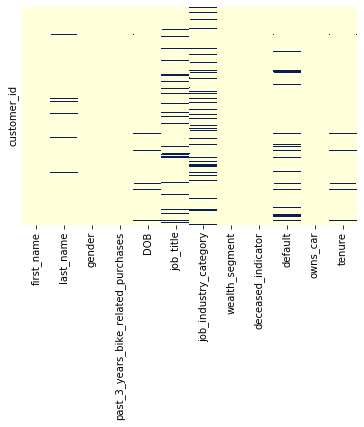

In [17]:
#Checking for null values:
sns.heatmap(cus_demo.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

In [18]:
## Filling the NA values in "Last Name" column of dataframe with the corresponding mode of this column:
cus_demo['last_name'] = cus_demo['last_name'].fillna(cus_demo['last_name'].mode().iloc[0])

## Filling the NA values in "DOB" column of dataframe with the corresponding mode of this column:
cus_demo['DOB'] = cus_demo['DOB'].fillna(cus_demo['DOB'].mode().iloc[0])

## Filling the NA values in "Job Title" column of dataframe with the corresponding mode of this column:
cus_demo['job_title'] = cus_demo['job_title'].fillna(cus_demo['job_title'].mode().iloc[0])

## Filling the NA values in "Job Industry Category" column of dataframe with the corresponding mode of this column:
cus_demo['job_industry_category'] = cus_demo['job_industry_category'].fillna(cus_demo['job_industry_category'].mode().iloc[0])

## Filling the NA values in "Tenure" column of dataframe with the corresponding mode of this column:
cus_demo['tenure'] = cus_demo['tenure'].fillna(cus_demo['tenure'].mode().iloc[0])


In [19]:
cus_demo.isnull().sum()

first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                   0
dtype: int64

In [20]:
cus_demo['gender'].value_counts()

Female    2037
Male      1872
U           88
Femal        1
F            1
M            1
Name: gender, dtype: int64

In [21]:
## Making some necessary changes to the data set:
cus_demo.drop(['first_name','last_name', 'default'],axis=1,inplace=True)
cus_demo['gender'].replace(['F', 'Femal'], 'Female', inplace = True)
cus_demo['gender'].replace('M', 'Male', inplace=True)
cus_demo['gender'].replace('U', 'Unknown', inplace=True)
cus_demo['deceased_indicator'].replace(['N'], 0, inplace=True)
cus_demo['deceased_indicator'].replace(['Y'], 1, inplace=True)
cus_demo['owns_car'].replace('Yes', 1, inplace=True)
cus_demo['owns_car'].replace('No', 0, inplace=True)
cus_demo = cus_demo[cus_demo['DOB'] != cus_demo.DOB.min()]
cus_demo[cus_demo['deceased_indicator'] == 0]
cus_demo = cus_demo.drop(['deceased_indicator'], axis=1)
 
cus_demo.head()


gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
5            Female                                   56 1977-05-13   

                                        job_title job_industry_category  \
customer_id                                                               
1                             Executive Secretary                Health   
2                          Administrative Officer    Financial Services   
3                              Recruiting Manager              Property   
4            Business Systems Development Analyst                    IT   
5                                   Senior Editor         Manufacturing   

                wealth_segment  owns_car  tenure  
customer_id                                       
1                Mass Customer         1    11.0  
2                Mass Customer         1    16.0  
3                Mass Customer         1    15.0  
4                Mass Customer         0     7.0  
5            Affluent Customer         1     8.0

In [22]:
cus_demo['gender'].value_counts()

Female     2039
Male       1873
Unknown      87
Name: gender, dtype: int64

In [23]:
#Adding age column to the data:
cus_demo['DOB'] = pd.to_datetime(cus_demo['DOB'], errors='coerce')
now = pd.to_datetime('now')
now
cus_demo['age'] = (now - cus_demo['DOB']).astype('<m8[Y]')

cus_demo.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
5            Female                                   56 1977-05-13   

                                        job_title job_industry_category  \
customer_id                                                               
1                             Executive Secretary                Health   
2                          Administrative Officer    Financial Services   
3                              Recruiting Manager              Property   
4            Business Systems Development Analyst                    IT   
5                                   Senior Editor         Manufacturing   

                wealth_segment  owns_car  tenure   age  
customer_id                                             
1                Mass Customer         1    11.0  68.0  
2                Mass Customer         1    16.0  41.0  
3                Mass Customer         1    15.0  68.0  
4                Mass Customer         0     7.0  60.0  
5            Affluent Customer         1     8.0  44.0

In [24]:
cus_demo.describe()

past_3_years_bike_related_purchases     owns_car       tenure  \
count                          3999.000000  3999.000000  3999.000000   
mean                             48.887472     0.506127    10.575144   
std                              28.718151     0.500025     5.622330   
min                               0.000000     0.000000     1.000000   
25%                              24.000000     0.000000     6.000000   
50%                              48.000000     1.000000    10.000000   
75%                              73.000000     1.000000    15.000000   
max                              99.000000     1.000000    22.000000   

               age  
count  3999.000000  
mean     44.132033  
std      12.479882  
min      20.000000  
25%      35.000000  
50%      44.000000  
75%      53.000000  
max      90.000000

#### *3.) Customer Address :*

In [25]:
cus_add = pd.read_excel("C:/Users/dhrit/Downloads/KPMG_VI_New_raw_data_update_final.xlsx",header=1,
                   sheet_name = "CustomerAddress")
cus_add = cus_add.sort_values('customer_id')
cus_add.head()

customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [26]:
cus_add.shape

(3999, 6)

In [27]:
cus_add.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null int64
address               3999 non-null object
postcode              3999 non-null int64
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null int64
dtypes: int64(3), object(3)
memory usage: 218.7+ KB


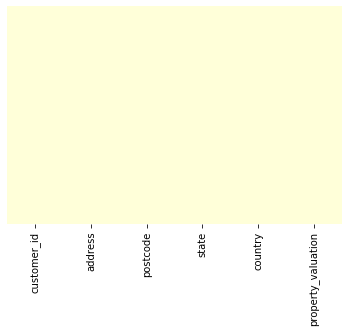

In [28]:
#Checking for null values:
sns.heatmap(cus_add.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

There are NO null values in the data set.

In [29]:
## Correcting the state names in dataframe:
cus_add['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [30]:
cus_add['state'].replace('New South Wales','NSW', inplace = True)
cus_add['state'].replace('Victoria','VIC', inplace = True)
cus_add.head()

customer_id              address  postcode state    country  \
0            1   060 Morning Avenue      2016   NSW  Australia   
1            2  6 Meadow Vale Court      2153   NSW  Australia   
2            4   0 Holy Cross Court      4211   QLD  Australia   
3            5  17979 Del Mar Point      2448   NSW  Australia   
4            6     9 Oakridge Court      3216   VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

#### *4.) Correspondence, 2017 Postcode to 2016 Remoteness Area :*

In [31]:
remote = pd.read_excel(r"C:\Users\dhrit\Downloads\1270055005_cg_postcode_2017_ra_2016\CG_POSTCODE_2017_RA_2016.xls",
                  sheet_name="Table 3", skiprows=5)
remote = remote.drop(0)
remote.rename(columns = {'POSTCODE_2017':'postcode'}, inplace = True)
remote.head()

postcode  POSTCODE_2017.1  RA_CODE_2016              RA_NAME_2016  RATIO  \
1     0800            800.0          72.0  Outer Regional Australia    1.0   
2     0810            810.0          72.0  Outer Regional Australia    1.0   
3     0812            812.0          72.0  Outer Regional Australia    1.0   
4     0815            815.0          72.0  Outer Regional Australia    1.0   
5     0820            820.0          72.0  Outer Regional Australia    1.0   

   PERCENTAGE  
1       100.0  
2       100.0  
3       100.0  
4       100.0  
5       100.0

In [32]:
## Merging Customer Address data with geographic remoteness of postcodes dataset
cus_add1 = pd.merge(cus_add,remote, on = "postcode")
cus_add1.head()

customer_id                 address postcode state    country  \
0            1      060 Morning Avenue     2016   NSW  Australia   
1         1059  1149 Riverside Parkway     2016   NSW  Australia   
2         2172        698 Lunder Point     2016   NSW  Australia   
3         2380             4 Judy Park     2016   NSW  Australia   
4         2768      9 Cascade Junction     2016   NSW  Australia   

   property_valuation  POSTCODE_2017.1  RA_CODE_2016  \
0                  10           2016.0          10.0   
1                  11           2016.0          10.0   
2                  10           2016.0          10.0   
3                  10           2016.0          10.0   
4                  12           2016.0          10.0   

                RA_NAME_2016  RATIO  PERCENTAGE  
0  Major Cities of Australia    1.0       100.0  
1  Major Cities of Australia    1.0       100.0  
2  Major Cities of Australia    1.0       100.0  
3  Major Cities of Australia    1.0       100.0  
4  Major Cities of Australia    1.0       100.0

In [33]:
cus_add1.tail()

customer_id             address postcode state    country  \
4865         3902       60 Towne Pass     2877   NSW  Australia   
4866         3902       60 Towne Pass     2877   NSW  Australia   
4867         3903   5 Rutledge Center     4311   QLD  Australia   
4868         3922  0 Southridge Drive     4311   QLD  Australia   
4869         3936   67473 Nova Avenue     3089   VIC  Australia   

      property_valuation  POSTCODE_2017.1  RA_CODE_2016  \
4865                   1           2877.0          12.0   
4866                   1           2877.0          13.0   
4867                   3           4311.0          31.0   
4868                   1           4311.0          31.0   
4869                  10           3089.0          20.0   

                   RA_NAME_2016     RATIO  PERCENTAGE  
4865   Outer Regional Australia  0.790422   79.042223  
4866           Remote Australia  0.209578   20.957777  
4867   Inner Regional Australia  1.000000  100.000000  
4868   Inner Regional Australia  1.000000  100.000000  
4869  Major Cities of Australia  1.000000  100.000000

In [34]:
cus_add1.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
POSTCODE_2017.1       0
RA_CODE_2016          0
RA_NAME_2016          0
RATIO                 0
PERCENTAGE            0
dtype: int64

### *Merging three datasets together for further analysis :*

In [35]:
merged_df = pd.merge(df_trans, cus_demo, on="customer_id")
df_final = pd.merge(merged_df, cus_add1, on="customer_id")
df_final.head()

product_id  customer_id transaction_date  online_order order_status  \
0          23            1       2017-03-27           0.0     Approved   
1          11            1       2017-03-29           1.0     Approved   
2           9            1       2017-12-09           1.0     Approved   
3          47            1       2017-05-11           1.0     Approved   
4           2            1       2017-02-21           0.0     Approved   

            brand product_line product_class product_size  list_price  ...  \
0  Norco Bicycles     Mountain           low        small      688.63  ...   
1  Giant Bicycles     Standard          high       medium     1274.93  ...   
2      OHM Cycles         Road        medium       medium      742.54  ...   
3   Trek Bicycles         Road           low        small     1720.70  ...   
4           Solex     Standard        medium       medium       71.49  ...   

              address postcode  state    country property_valuation  \
0  060 Morning Avenue     2016    NSW  Australia                 10   
1  060 Morning Avenue     2016    NSW  Australia                 10   
2  060 Morning Avenue     2016    NSW  Australia                 10   
3  060 Morning Avenue     2016    NSW  Australia                 10   
4  060 Morning Avenue     2016    NSW  Australia                 10   

   POSTCODE_2017.1 RA_CODE_2016               RA_NAME_2016 RATIO PERCENTAGE  
0           2016.0         10.0  Major Cities of Australia   1.0      100.0  
1           2016.0         10.0  Major Cities of Australia   1.0      100.0  
2           2016.0         10.0  Major Cities of Australia   1.0      100.0  
3           2016.0         10.0  Major Cities of Australia   1.0      100.0  
4           2016.0         10.0  Major Cities of Australia   1.0      100.0  

[5 rows x 33 columns]

In [36]:
## Defining a function to extract month from Transaction Date
def get_month(date):
    return date.strftime("%B")

## Adding Transaction Month column to the data 
df_final['Month'] = df_final['transaction_date'].apply(get_month)
df_final.head()

product_id  customer_id transaction_date  online_order order_status  \
0          23            1       2017-03-27           0.0     Approved   
1          11            1       2017-03-29           1.0     Approved   
2           9            1       2017-12-09           1.0     Approved   
3          47            1       2017-05-11           1.0     Approved   
4           2            1       2017-02-21           0.0     Approved   

            brand product_line product_class product_size  list_price  ...  \
0  Norco Bicycles     Mountain           low        small      688.63  ...   
1  Giant Bicycles     Standard          high       medium     1274.93  ...   
2      OHM Cycles         Road        medium       medium      742.54  ...   
3   Trek Bicycles         Road           low        small     1720.70  ...   
4           Solex     Standard        medium       medium       71.49  ...   

   postcode state    country property_valuation POSTCODE_2017.1  RA_CODE_2016  \
0      2016   NSW  Australia                 10          2016.0          10.0   
1      2016   NSW  Australia                 10          2016.0          10.0   
2      2016   NSW  Australia                 10          2016.0          10.0   
3      2016   NSW  Australia                 10          2016.0          10.0   
4      2016   NSW  Australia                 10          2016.0          10.0   

                RA_NAME_2016 RATIO PERCENTAGE     Month  
0  Major Cities of Australia   1.0      100.0     March  
1  Major Cities of Australia   1.0      100.0     March  
2  Major Cities of Australia   1.0      100.0  December  
3  Major Cities of Australia   1.0      100.0       May  
4  Major Cities of Australia   1.0      100.0  February  

[5 rows x 34 columns]

In [37]:
df_final.shape

(24160, 34)

In [38]:
## Getting rid of irrelevant columns
df_final.drop(['transaction_date', 'online_order','order_status','list_price','standard_cost',
               'product_first_sold_date','DOB','job_title','postcode','address','country','POSTCODE_2017.1','property_valuation'], axis=1, inplace = True)
df_final.head()

product_id  customer_id           brand product_line product_class  \
0          23            1  Norco Bicycles     Mountain           low   
1          11            1  Giant Bicycles     Standard          high   
2           9            1      OHM Cycles         Road        medium   
3          47            1   Trek Bicycles         Road           low   
4           2            1           Solex     Standard        medium   

  product_size  Profit  Recency  gender  past_3_years_bike_related_purchases  \
0        small   75.75 278 days  Female                                   93   
1       medium  509.97 276 days  Female                                   93   
2       medium   75.14  21 days  Female                                   93   
3        small  189.28 233 days  Female                                   93   
4       medium   17.87 312 days  Female                                   93   

   ... wealth_segment owns_car  tenure   age  state RA_CODE_2016  \
0  ...  Mass Customer        1    11.0  68.0    NSW         10.0   
1  ...  Mass Customer        1    11.0  68.0    NSW         10.0   
2  ...  Mass Customer        1    11.0  68.0    NSW         10.0   
3  ...  Mass Customer        1    11.0  68.0    NSW         10.0   
4  ...  Mass Customer        1    11.0  68.0    NSW         10.0   

                RA_NAME_2016 RATIO  PERCENTAGE     Month  
0  Major Cities of Australia   1.0       100.0     March  
1  Major Cities of Australia   1.0       100.0     March  
2  Major Cities of Australia   1.0       100.0  December  
3  Major Cities of Australia   1.0       100.0       May  
4  Major Cities of Australia   1.0       100.0  February  

[5 rows x 21 columns]

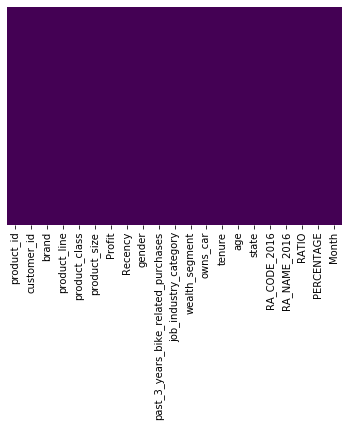

In [39]:
#Checking for null values:
sns.heatmap(df_final.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [40]:
df_final.shape

(24160, 21)

In [41]:
df_final.describe()

product_id   customer_id        Profit                   Recency  \
count  24160.000000  24160.000000  24160.000000                     24160   
mean      45.340232   1743.667136    551.816573  181 days 13:07:17.483443   
std       30.803960   1006.142813    494.841038  105 days 10:04:26.573243   
min        0.000000      1.000000   -491.500000           0 days 00:00:00   
25%       17.000000    881.000000    133.780000          89 days 00:00:00   
50%       44.000000   1743.000000    445.210000         180 days 00:00:00   
75%       72.000000   2616.000000    830.240000         273 days 00:00:00   
max      100.000000   3500.000000   1702.550000         363 days 00:00:00   

       past_3_years_bike_related_purchases      owns_car        tenure  \
count                         24160.000000  24160.000000  24160.000000   
mean                             48.712707      0.503642     10.602359   
std                              28.561332      0.499997      5.609677   
min                               0.000000      0.000000      1.000000   
25%                              24.000000      0.000000      6.000000   
50%                              48.000000      1.000000     10.000000   
75%                              73.000000      1.000000     15.000000   
max                              99.000000      1.000000     22.000000   

                age  RA_CODE_2016         RATIO    PERCENTAGE  
count  24160.000000  24160.000000  24160.000000  24160.000000  
mean      43.992881     17.671896      0.826117     82.611735  
std       12.484796      9.260058      0.353792     35.379216  
min       20.000000     10.000000      0.000212      0.021209  
25%       35.000000     10.000000      0.965409     96.540881  
50%       44.000000     12.000000      1.000000    100.000000  
75%       53.000000     21.000000      1.000000    100.000000  
max       90.000000     91.000000      1.000000    100.000000

- Average profit earned by company is around 551.82 dollars.
- Average past 3 year bike related purchases is approx 48 bikes.

## *Step 2 : Data Exploration*

### *Checking for some correlation :*

In [42]:
df_final.corr()

product_id  customer_id    Profit  \
product_id                             1.000000     0.007056  0.071962   
customer_id                            0.007056     1.000000  0.008368   
Profit                                 0.071962     0.008368  1.000000   
past_3_years_bike_related_purchases   -0.001262     0.006664  0.015093   
owns_car                              -0.032973     0.026120  0.015107   
tenure                                -0.008114    -0.028895  0.006773   
age                                   -0.010757    -0.024882 -0.003693   
RA_CODE_2016                           0.007879     0.036287  0.006509   
RATIO                                  0.002166    -0.006135  0.001543   
PERCENTAGE                             0.002166    -0.006135  0.001543   

                                     past_3_years_bike_related_purchases  \
product_id                                                     -0.001262   
customer_id                                                     0.006664   
Profit                                                          0.015093   
past_3_years_bike_related_purchases                             1.000000   
owns_car                                                        0.019677   
tenure                                                         -0.008363   
age                                                            -0.035128   
RA_CODE_2016                                                    0.002476   
RATIO                                                           0.003278   
PERCENTAGE                                                      0.003278   

                                     owns_car    tenure       age  \
product_id                          -0.032973 -0.008114 -0.010757   
customer_id                          0.026120 -0.028895 -0.024882   
Profit                               0.015107  0.006773 -0.003693   
past_3_years_bike_related_purchases  0.019677 -0.008363 -0.035128   
owns_car                             1.000000  0.000657  0.004321   
tenure                               0.000657  1.000000  0.441954   
age                                  0.004321  0.441954  1.000000   
RA_CODE_2016                         0.009900  0.038740  0.010695   
RATIO                               -0.002387 -0.002867  0.010721   
PERCENTAGE                          -0.002387 -0.002867  0.010721   

                                     RA_CODE_2016     RATIO  PERCENTAGE  
product_id                               0.007879  0.002166    0.002166  
customer_id                              0.036287 -0.006135   -0.006135  
Profit                                   0.006509  0.001543    0.001543  
past_3_years_bike_related_purchases      0.002476  0.003278    0.003278  
owns_car                                 0.009900 -0.002387   -0.002387  
tenure                                   0.038740 -0.002867   -0.002867  
age                                      0.010695  0.010721    0.010721  
RA_CODE_2016                             1.000000 -0.162106   -0.162106  
RATIO                                   -0.162106  1.000000    1.000000  
PERCENTAGE                              -0.162106  1.000000    1.000000

- Here, two independent variables are correlated with a correlation of 0.441489.

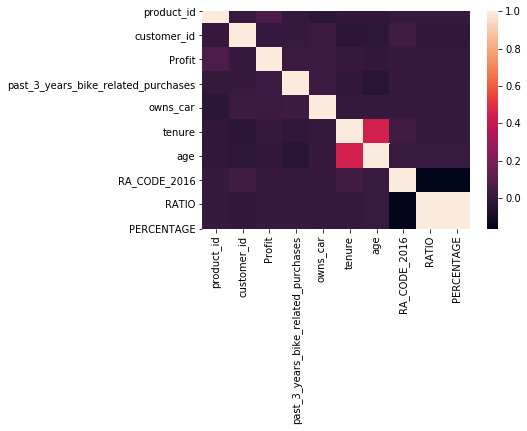

In [43]:
sns.heatmap(df_final.corr())

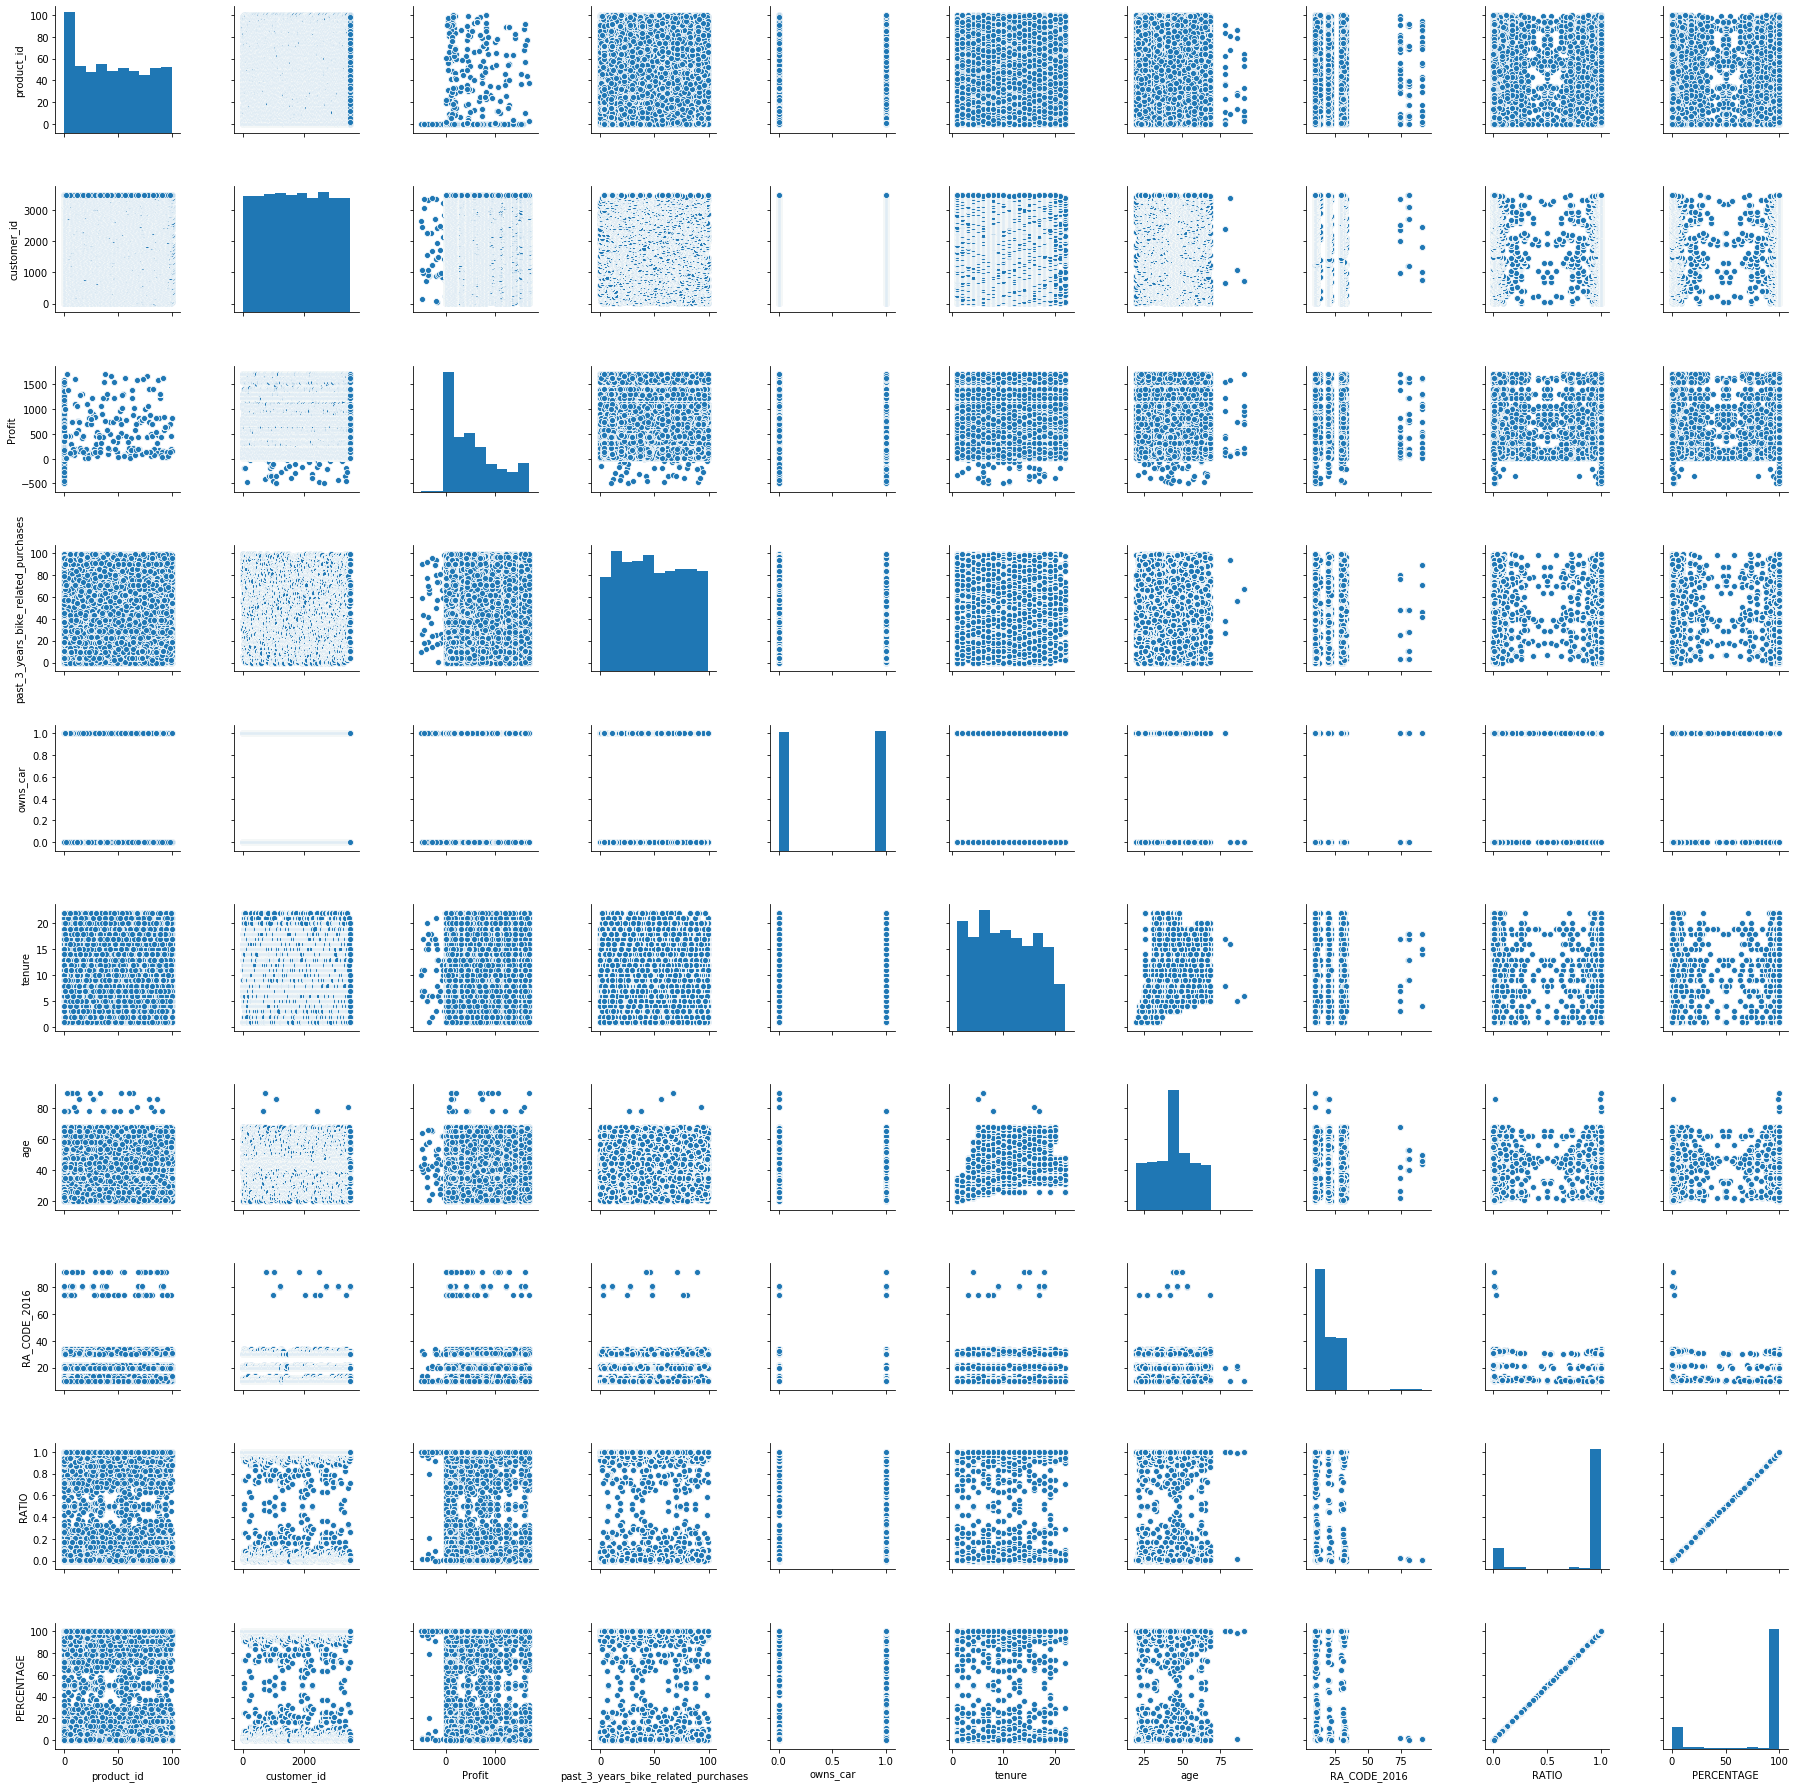

In [44]:
## Scatter Plot Matrix
sns.pairplot(df_final)

### *Univariate Analysis :*

#### *Numerical Variables' Distribution*

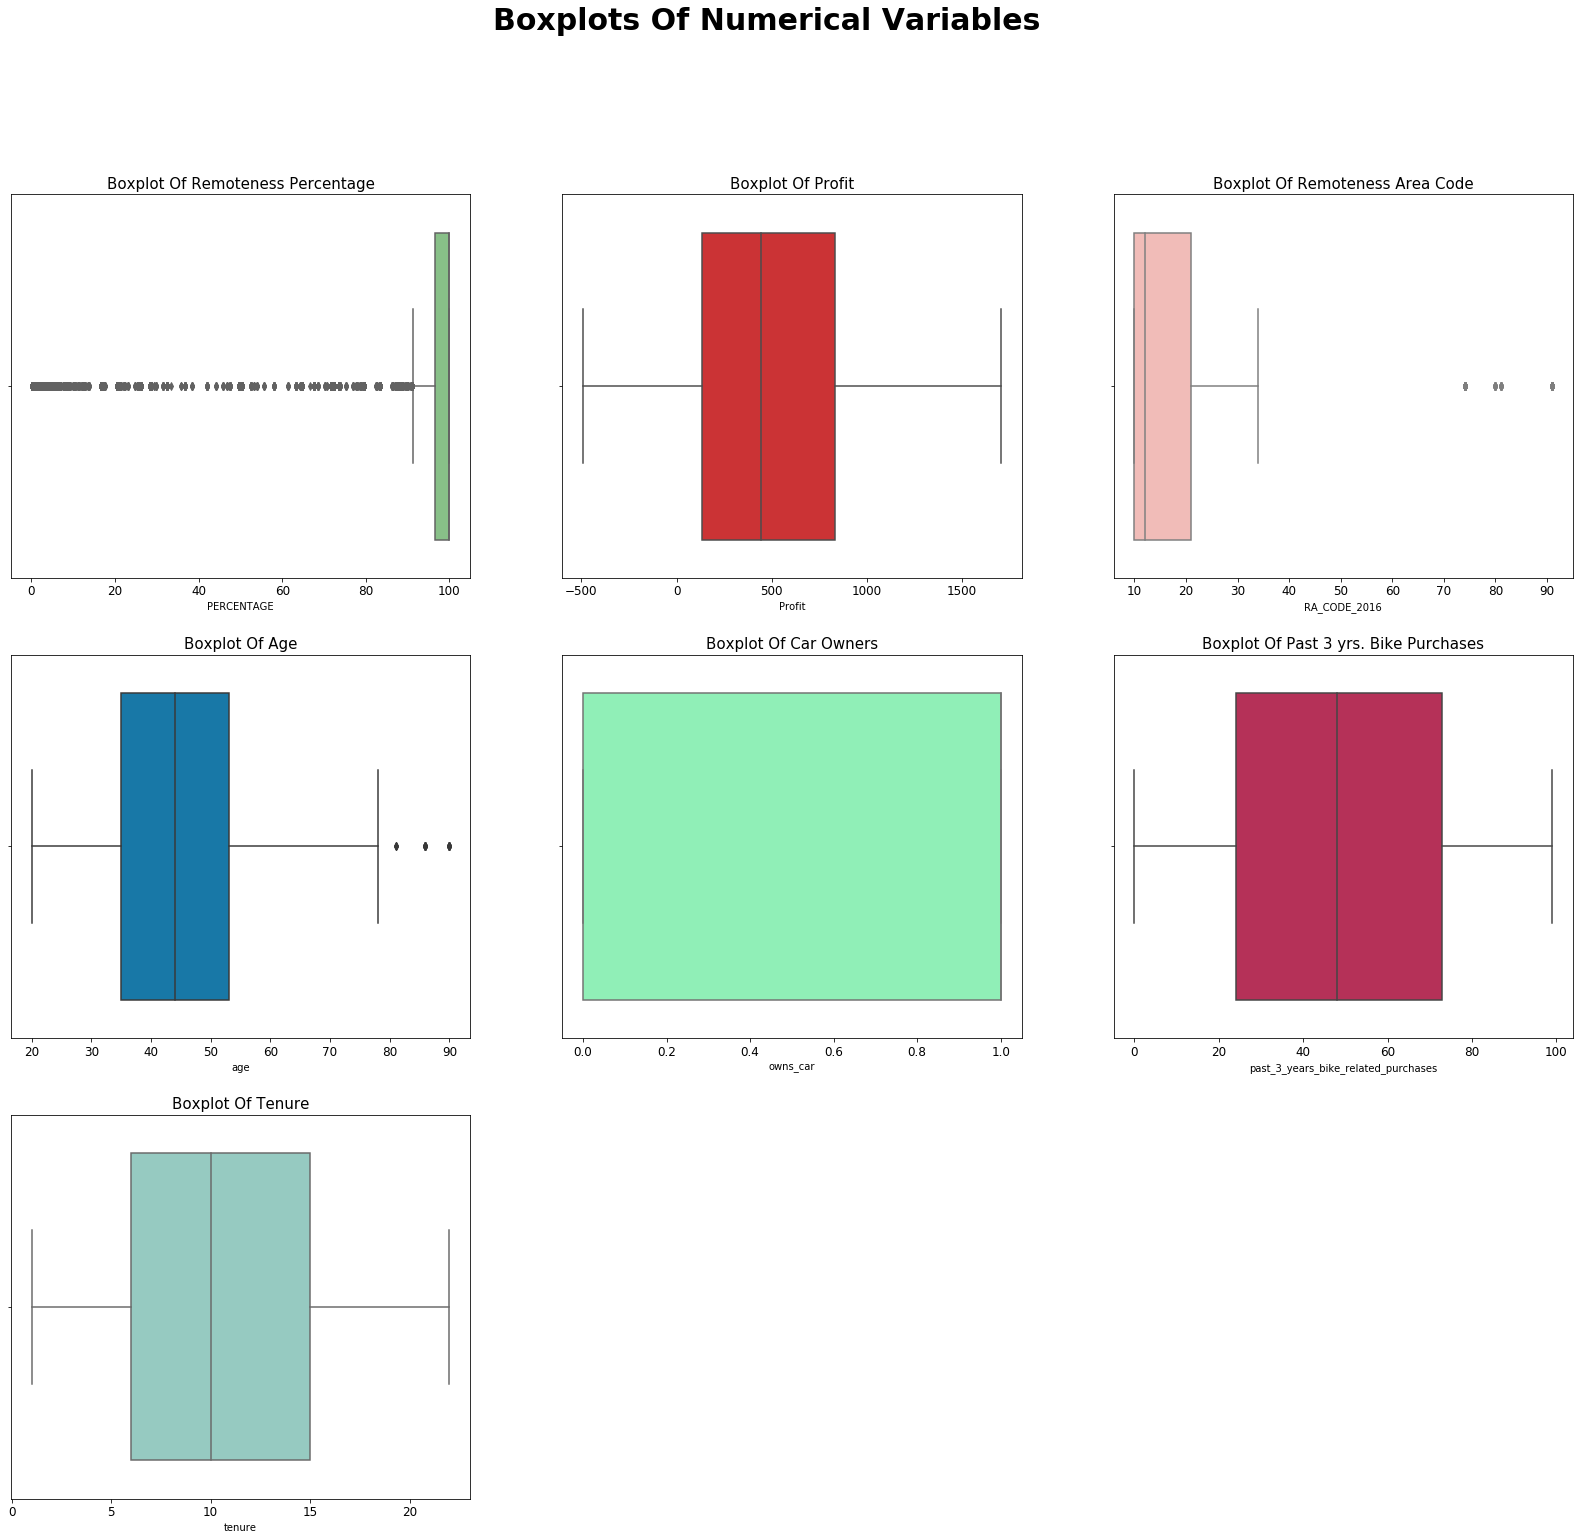

In [45]:
fig, ax = plt.subplots(figsize=(28,24))
fig.suptitle('Boxplots Of Numerical Variables', fontsize=30, weight='bold', va = 'center')

# PERCENTAGE BASED SUBPLOT
plt.subplot(3, 3, 1)
sns.boxplot(df_final['PERCENTAGE'],palette = 'Accent')
plt.xticks(fontsize = 12)
plt.title("Boxplot Of Remoteness Percentage",fontsize = 15);

# PROFIT BASED SUBPLOT
plt.subplot(3, 3, 2)
sns.boxplot(df_final['Profit'],palette = 'Set1')
plt.xticks(fontsize = 12)
plt.title("Boxplot Of Profit",fontsize = 15);

# REMOTENESS AREA CODE BASED SUBPLOT
plt.subplot(3, 3, 3)
sns.boxplot(df_final['RA_CODE_2016'],palette = 'Pastel1')
plt.xticks(fontsize = 12)
plt.title("Boxplot Of Remoteness Area Code",fontsize = 15);

# AGE BASED SUBPLOT
plt.subplot(3, 3, 4)
sns.boxplot(df_final['age'],palette = 'winter')
plt.xticks(fontsize = 12)
plt.title("Boxplot Of Age",fontsize = 15);

# CAR OWNERS BASED SUBPLOT
plt.subplot(3, 3, 5)
sns.boxplot(df_final['owns_car'],palette = 'rainbow')
plt.xticks(fontsize = 12)
plt.title("Boxplot Of Car Owners",fontsize = 15);

# PAST 3 YEAR BIKE PURCHASES BASED SUBPLOT
plt.subplot(3, 3, 6)
sns.boxplot(df_final['past_3_years_bike_related_purchases'],palette = 'rocket')
plt.xticks(fontsize = 12)
plt.title("Boxplot Of Past 3 yrs. Bike Purchases",fontsize = 15);

# TENURE BASED SUBPLOT
plt.subplot(3, 3, 7)
sns.boxplot(df_final['tenure'],palette = 'Set3')
plt.xticks(fontsize = 12)
plt.title("Boxplot Of Tenure",fontsize = 15);

From above plot we can clearly see following things:   

- Percentage data is negatively skewed and contain many outliers.
- Remoteness area code data is positively skewed and contain many outliers.
- Data of Age variable contains outliers.
- Tenure, Past 3 years bike related purchases and Profit related data are all symmetrical.

In [46]:
## Outlier Treatment for variable 'age':

## IQR
q1 = np.percentile(df_final['age'], 25, interpolation = 'midpoint')
q3 = np.percentile(df_final['age'], 75, interpolation = 'midpoint')
IQR = q3 - q1
print("Old Shape:", df_final.shape)

## Upper Bound
upper = np.where(df_final['age'] >= (q3 + 1.5*IQR))

## Lower Bound
lower = np.where(df_final['age'] <= (q1 - 1.5*IQR))

## Removing the Outliers
df_final.drop(upper[0], inplace = True)
df_final.drop(lower[0], inplace = True)

print("New Shape:", df_final.shape)

Old Shape: (24160, 21)
New Shape: (24137, 21)


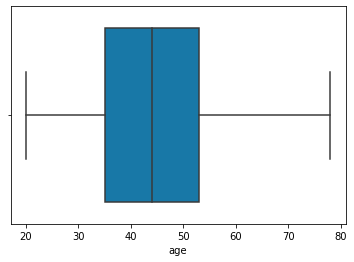

In [47]:
## Checking the plot age for any outliers
sns.boxplot(df_final['age'],palette = 'winter')

In [48]:
## Creating Age-groups column:

bins = [18, 30, 40, 50, 60, 70, 90]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

df_final['age_group'] = pd.cut(df_final.age, bins, labels = labels,include_lowest = True)

df_final.head()

product_id  customer_id           brand product_line product_class  \
0          23            1  Norco Bicycles     Mountain           low   
1          11            1  Giant Bicycles     Standard          high   
2           9            1      OHM Cycles         Road        medium   
3          47            1   Trek Bicycles         Road           low   
4           2            1           Solex     Standard        medium   

  product_size  Profit  Recency  gender  past_3_years_bike_related_purchases  \
0        small   75.75 278 days  Female                                   93   
1       medium  509.97 276 days  Female                                   93   
2       medium   75.14  21 days  Female                                   93   
3        small  189.28 233 days  Female                                   93   
4       medium   17.87 312 days  Female                                   93   

   ... owns_car tenure   age  state  RA_CODE_2016               RA_NAME_2016  \
0  ...        1   11.0  68.0    NSW          10.0  Major Cities of Australia   
1  ...        1   11.0  68.0    NSW          10.0  Major Cities of Australia   
2  ...        1   11.0  68.0    NSW          10.0  Major Cities of Australia   
3  ...        1   11.0  68.0    NSW          10.0  Major Cities of Australia   
4  ...        1   11.0  68.0    NSW          10.0  Major Cities of Australia   

   RATIO PERCENTAGE     Month  age_group  
0    1.0      100.0     March      60-69  
1    1.0      100.0     March      60-69  
2    1.0      100.0  December      60-69  
3    1.0      100.0       May      60-69  
4    1.0      100.0  February      60-69  

[5 rows x 22 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8AC47D748>,
      dtype=object)

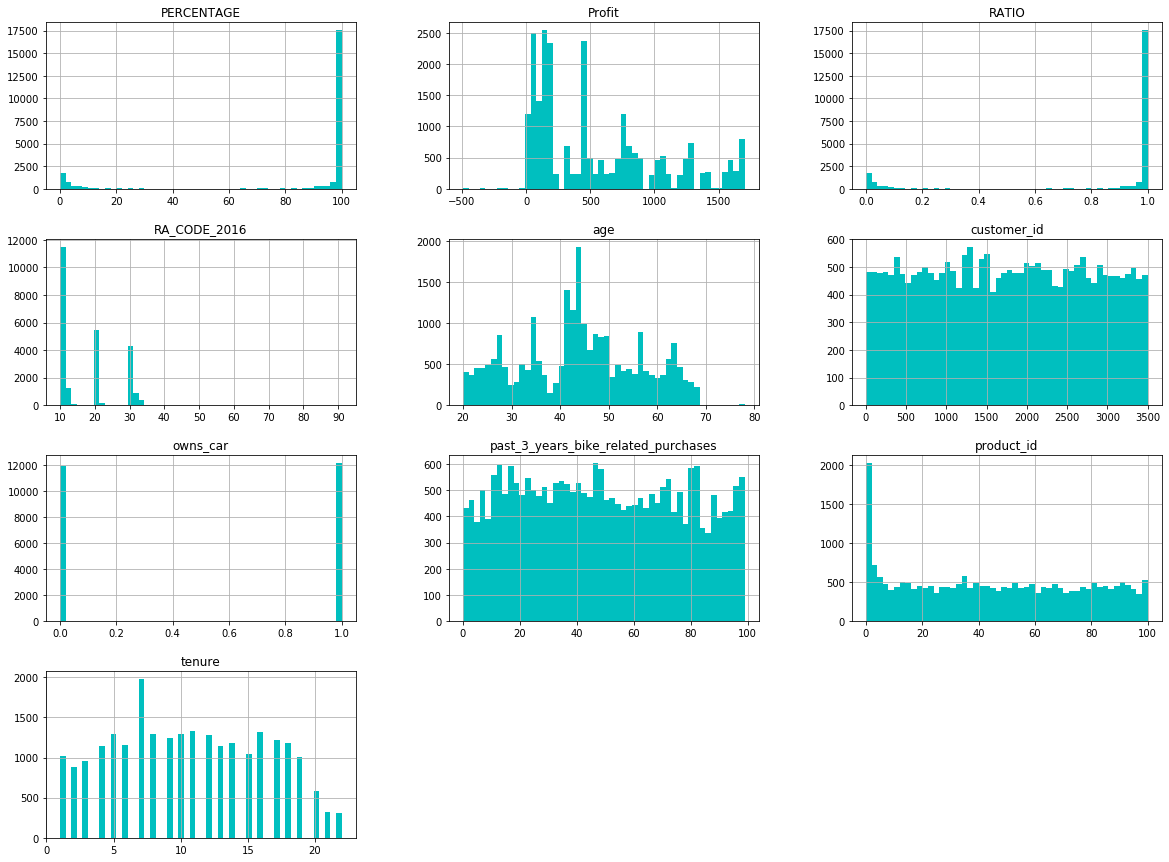

In [49]:
df_final.hist(bins=50, figsize=(20,15),color='c')

#### *Categorical Variable Distibution*

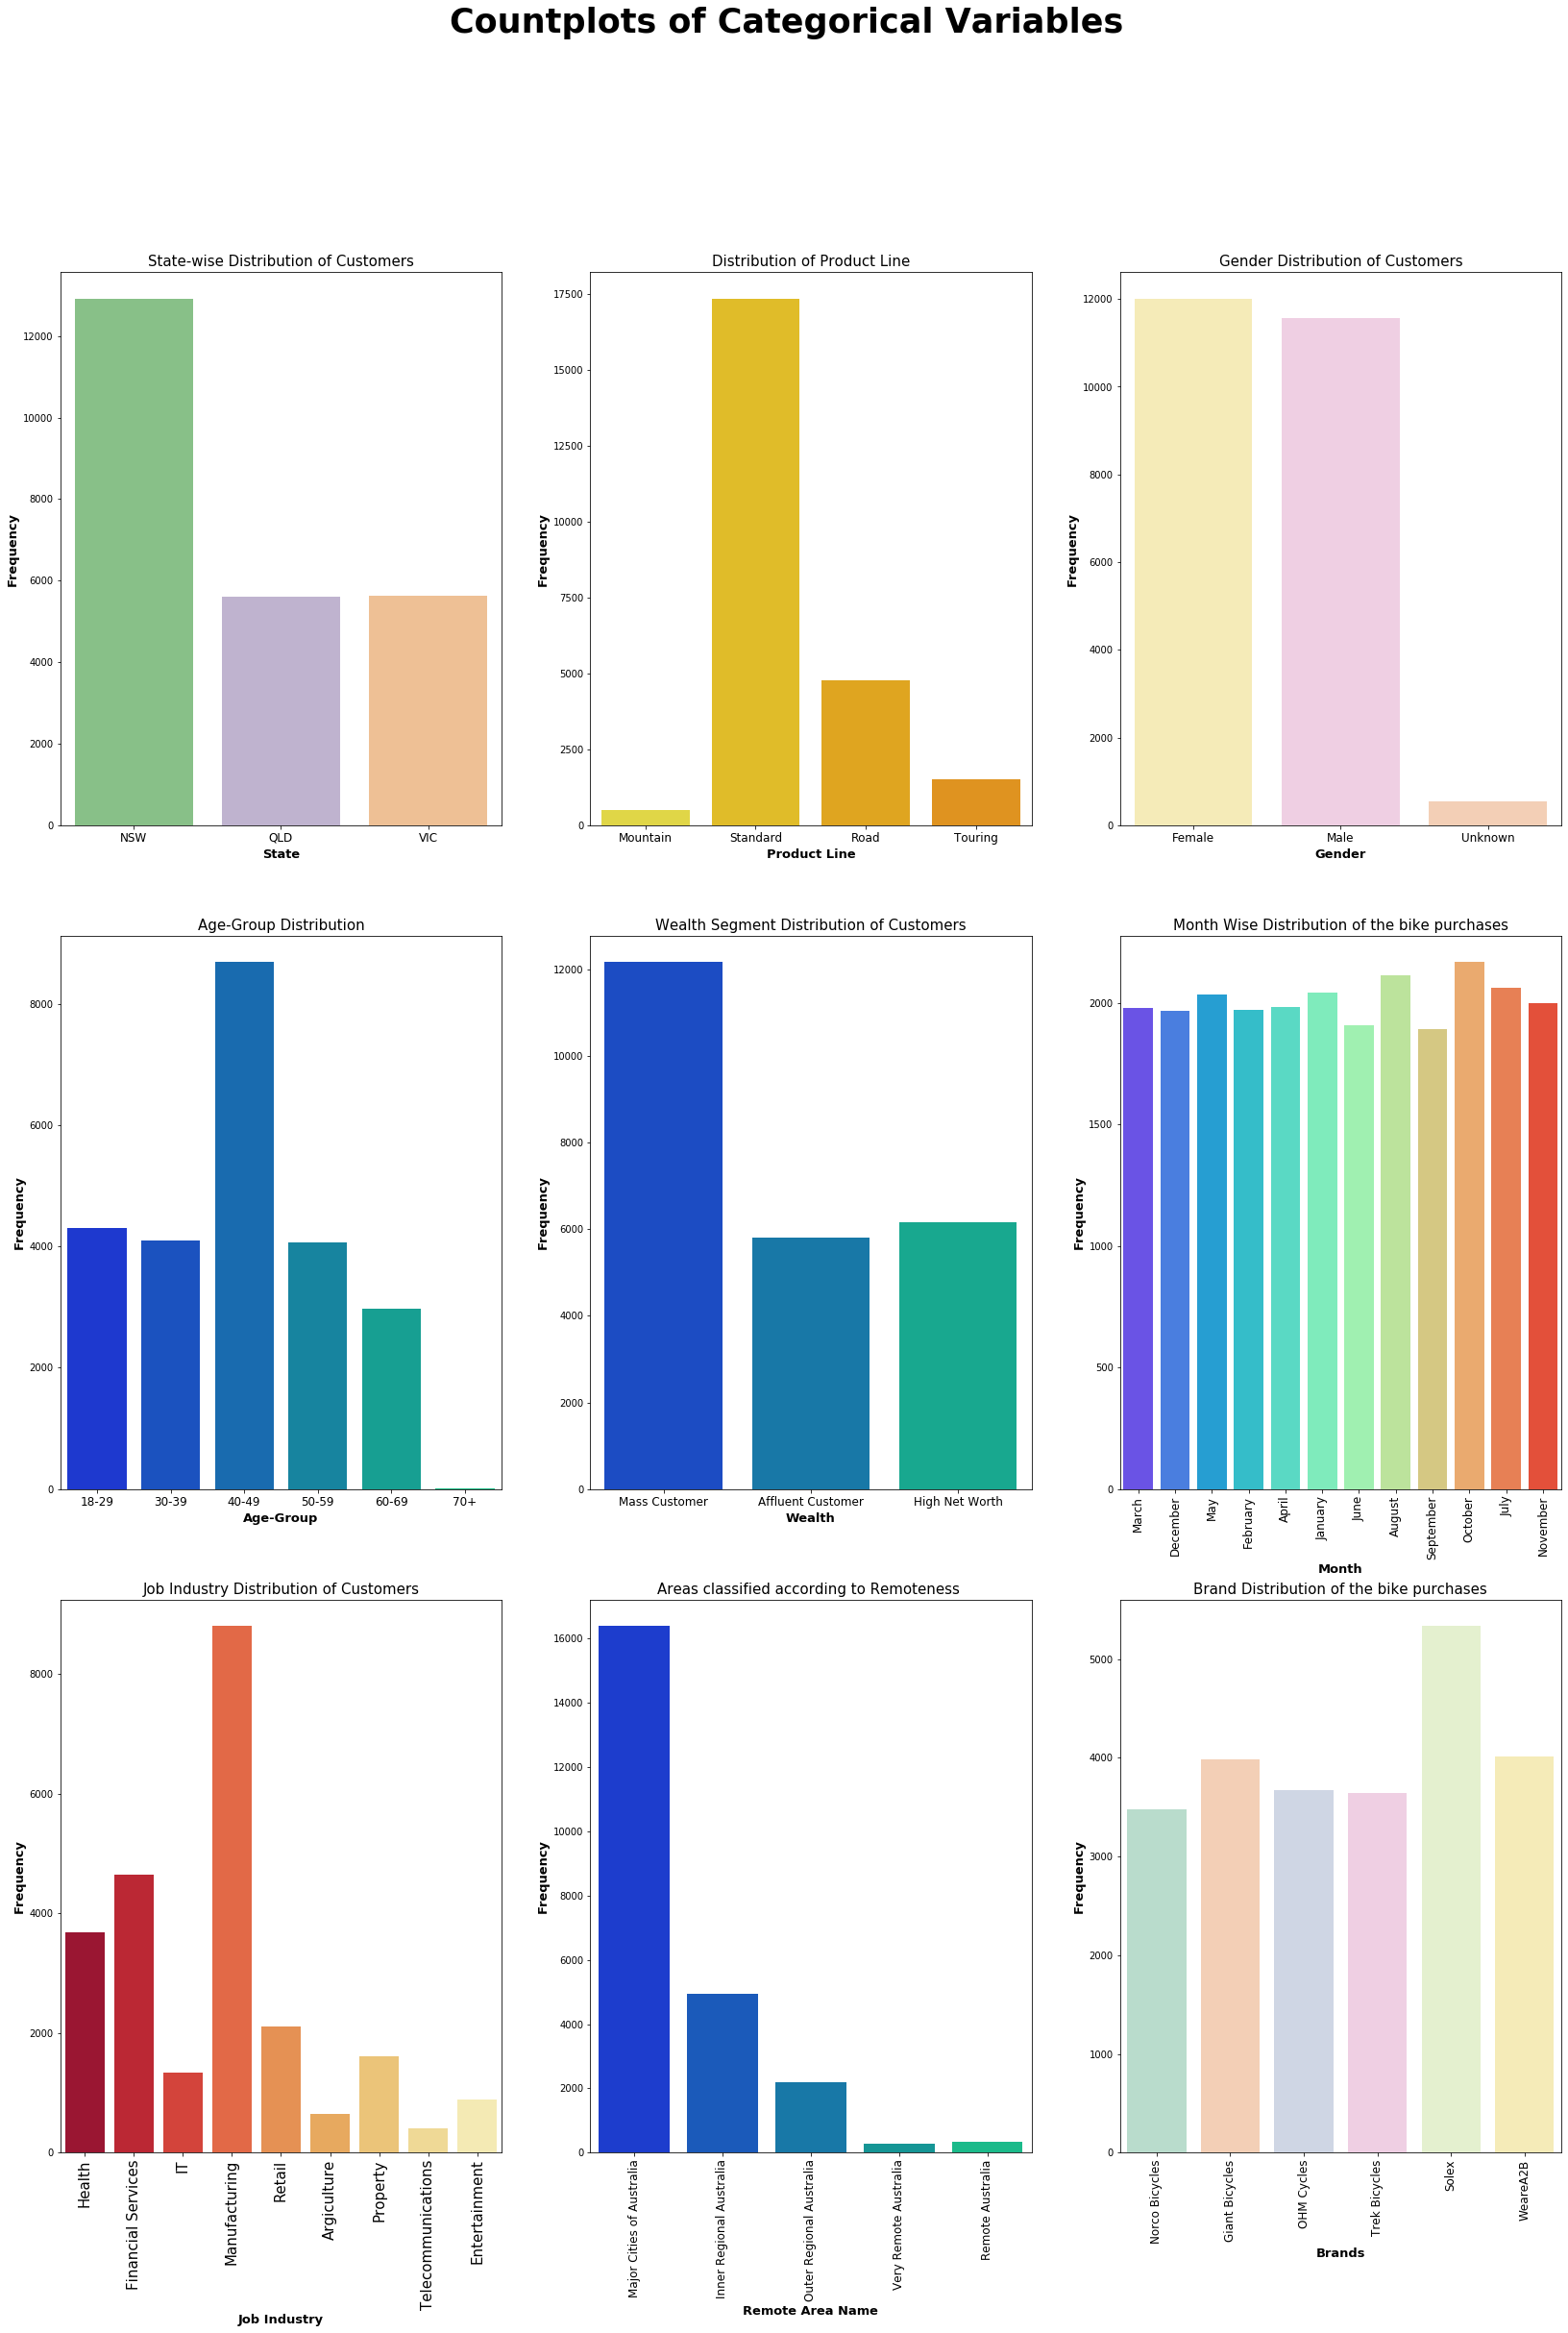

In [50]:
fig, ax = plt.subplots(3, 3, figsize=(28,36))
fig.suptitle('Countplots of Categorical Variables', fontsize=35, weight='bold', va = 'center')

# STATE BASED SUBPLOT
plt.subplot(3, 3, 1)
sns.countplot(df_final['state'],palette = 'Accent')
plt.xticks(fontsize = 12)
plt.title("State-wise Distribution of Customers",fontsize = 15);
plt.xlabel("State",fontsize=13, weight = 'bold');
plt.ylabel("Frequency", fontsize=13,weight = 'bold');

# PRODUCT LINE BASED SUBPLOT
plt.subplot(3,3,2)
sns.countplot(df_final['product_line'], palette = 'Wistia')
plt.xticks(fontsize = 12)
plt.title("Distribution of Product Line" ,fontsize = 15);
plt.xlabel("Product Line", fontsize=13,weight = 'bold');
plt.ylabel("Frequency", fontsize=13,weight = 'bold');

# GENDER BASED SUBPLOT
plt.subplot(3, 3, 3)
sns.countplot(df_final['gender'], palette = 'Pastel2_r')
plt.xticks(fontsize = 12)
plt.title("Gender Distribution of Customers",fontsize = 15);
plt.xlabel("Gender", fontsize=13,weight = 'bold');
plt.ylabel("Frequency", fontsize=13,weight = 'bold');

# AGE-GROUP BASED SUBPLOT
plt.subplot(3,3,4)
p1 = sns.countplot(df_final['age_group'],palette = 'winter')
p1.set_xticklabels(p1.get_xticklabels(), fontsize = 12)
plt.title('Age-Group Distribution',fontsize = 15);
plt.xlabel("Age-Group", fontsize = 13,weight = 'bold');
plt.ylabel("Frequency", fontsize = 13,weight = 'bold');

# WEALTH SEGMENT BASED SUBPLOT
plt.subplot(3, 3, 5)
p2 = sns.countplot(df_final['wealth_segment'], palette = 'winter')
p2.set_xticklabels(p2.get_xticklabels(), fontsize = 12)
plt.title("Wealth Segment Distribution of Customers",fontsize = 15);
plt.xlabel("Wealth", fontsize=13,weight = 'bold');
plt.ylabel("Frequency", fontsize=13,weight = 'bold');

# MONTH-WISE SUBPLOT
plt.subplot(3,3,6)
p3 = sns.countplot(df_final['Month'],palette = 'rainbow')
p3.set_xticklabels(p3.get_xticklabels(), fontsize = 12, rotation=90)
plt.title('Month Wise Distribution of the bike purchases',fontsize = 15);
plt.xlabel("Month", fontsize=13,weight = 'bold');
plt.ylabel("Frequency", fontsize=13,weight = 'bold');

# JOB INDUSTRY CATEGORY BASED SUBPLOT
plt.subplot(3, 3, 7)
p4 = sns.countplot(df_final['job_industry_category'], palette = 'YlOrRd_r')
p4.set_xticklabels(p4.get_xticklabels(), fontsize = 15, rotation = 90)
plt.title("Job Industry Distribution of Customers",fontsize = 15);
plt.xlabel("Job Industry", fontsize=13,weight = 'bold');
plt.ylabel("Frequency", fontsize=13,weight = 'bold');

# REMOTENESS AREA NAME BASED SUBPLOT
plt.subplot(3,3,8)
p5 = sns.countplot(df_final['RA_NAME_2016'],palette = 'winter')
p5.set_xticklabels(p5.get_xticklabels(), fontsize = 12, rotation=90)
plt.title('Areas classified according to Remoteness ',fontsize = 15);
plt.xlabel("Remote Area Name", fontsize = 13,weight = 'bold');
plt.ylabel("Frequency", fontsize = 13,weight = 'bold');


# BRAND BASED SUBPLOT
plt.subplot(3,3,9)
p6 = sns.countplot(df_final['brand'],palette = 'Pastel2')
p6.set_xticklabels(p6.get_xticklabels(), fontsize = 12, rotation=90)
plt.title('Brand Distribution of the bike purchases',fontsize = 15);
plt.xlabel("Brands", fontsize=13,weight = 'bold');
plt.ylabel("Frequency",fontsize=13, weight = 'bold');

Above plot can lead us to following conclusions:

- Maximum number of customers are from the state of New South Wales, Australia.
- Maximum brand sales has been done for products transported via the standard line compared to the products being transported     through road, mountain or touring lines.
- Number of Female customers are slightly more than the male customers.
- Most of the customers belong to **Manufacturing** Job Industry followed by Financial Services and Health respectively.
- Mass customers are the largest contributors for increasing sales of the bikes.
- The **Highest Sales are for brand, Solex** followed by Giant Bicycles and WeareA2B having almost same number of sales.
  So, we should focus on increasing the sale of products of brand Solex so as to make large profit. Also, more work should be     done to increase the sales of the brand like Norco Bicycles.
- **October** Bike Sales is highest among all other months. In fact,almost all the months does not differ by large amount. 
- Customers of the Sprocket Central Pty. Limited mainly belong to Major Cities Of Australia (in terms of Remoteness).
- Maximum number of customers belong to the age-group of 40-49.

Text(0, 0.5, 'Age-Group')

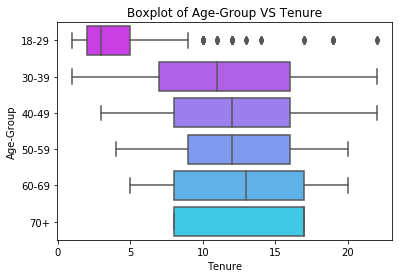

In [51]:
## Checking whether some independent variables are correlated or not.
sns.boxplot(x='tenure',y='age_group',data=df_final,palette='cool_r')
plt.title("Boxplot of Age-Group VS Tenure")
plt.xlabel("Tenure")
plt.ylabel("Age-Group")

Above plots clearly show that the independent variables, **Age** and **Tenure** are correlated i.e., people
of the older brackets will have a longer tenure.

Text(0, 0.5, 'Count')

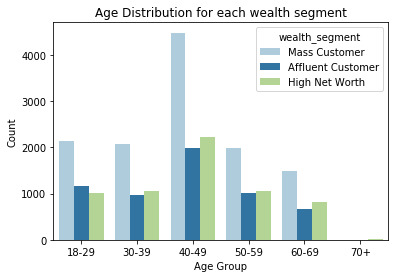

In [52]:
sns.countplot(x='age_group',hue='wealth_segment',data=df_final, palette = 'Paired')
plt.title('Age Distribution for each wealth segment')
plt.xlabel('Age Group')
plt.ylabel('Count')

Most of the customers are from the Mass Customer wealth segment belonging to 40-49 age group. 

Text(0, 0.5, 'Count')

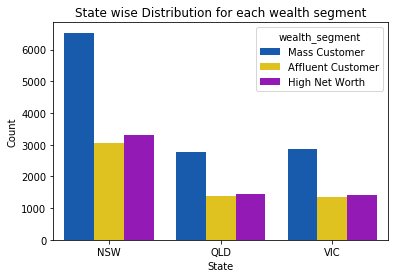

In [53]:
sns.countplot(x='state',hue='wealth_segment',data=df_final, palette = 'prism')
plt.title('State wise Distribution for each wealth segment')
plt.xlabel('State')
plt.ylabel('Count')

Text(0.5, 1.0, 'Plot of Brand-wise Profit Distribution')

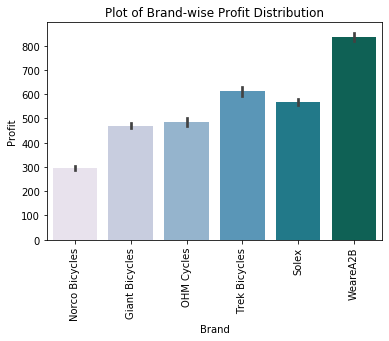

In [54]:
br = sns.barplot(x='brand',y='Profit',data=df_final, palette = 'PuBuGn')
br.set_xticklabels(br.get_xticklabels(), rotation =90)
plt.xlabel('Brand')
plt.ylabel('Profit')
plt.title('Plot of Brand-wise Profit Distribution')

WeareA2B bicycles is the most profitable brand while Norco bicycles is the least.

Text(0, 0.5, 'Count')

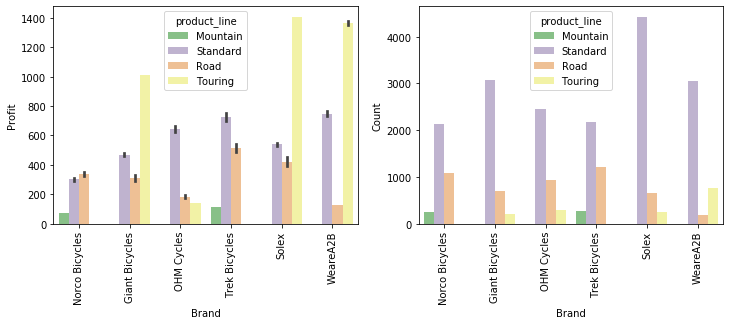

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

## Subplot 1
plt.subplot(1,2,1)
a = sns.barplot(x='brand',y='Profit',hue='product_line',data=df_final, palette = 'Accent')
a.set_xticklabels(a.get_xticklabels(), rotation =90)
plt.xlabel('Brand')
plt.ylabel('Profit')

## Subplot 2
plt.subplot(1,2,2)
b = sns.countplot(x='brand',hue='product_line',data=df_final, palette = 'Accent')
b.set_xticklabels(b.get_xticklabels(), rotation =90)
plt.xlabel('Brand')
plt.ylabel('Count')

- Maximum brand sales has been done for products transported via the standard line compared to the products being transported     through road, mountain or touring lines.
- Maximum sales are for the brand Solex.
- The brand earning highest profit is WeareA2B via the Touring Line.

Text(0.5, 1.0, 'Age Distribution')

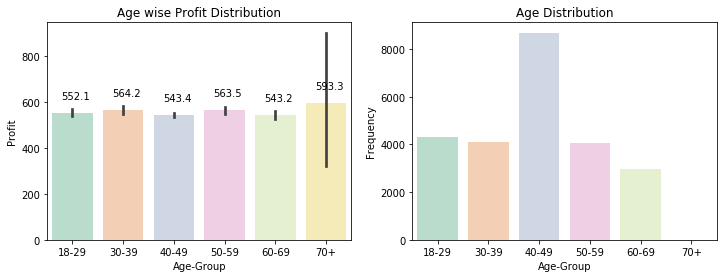

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

## SUBPLOT 1
plt.subplot(1,2,1)
ag = sns.barplot(x='age_group',y='Profit',data=df_final, palette = 'Pastel2')
for p in ag.patches:
    plt.annotate(format(p.get_height(),'.1f'),
                 (p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(3,17),textcoords='offset points')
plt.xlabel('Age-Group')
plt.ylabel('Profit')
plt.title('Age wise Profit Distribution')

## SUBPLOT 2
plt.subplot(1,2,2)
sns.countplot(x='age_group',data=df_final, palette = 'Pastel2')
plt.xlabel('Age-Group')
plt.ylabel('Frequency')
plt.title('Age Distribution')

Most of the customers are from **40-49 Age-Group**.

Text(0, 0.5, 'Past 3 years bike related purchases')

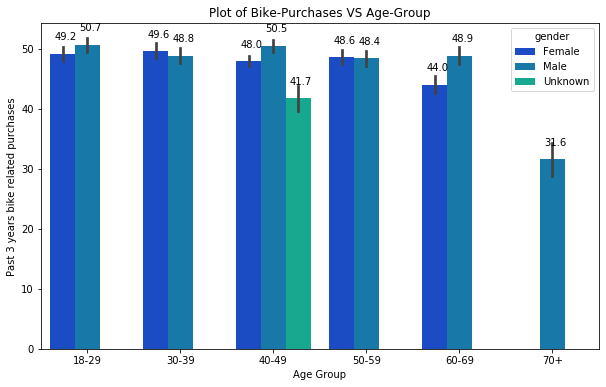

In [57]:
## Bar-Plot
plt.figure(figsize=(10,6))
gen = sns.barplot(x = 'age_group', y = 'past_3_years_bike_related_purchases',hue = 'gender', 
                  data = df_final, palette = 'winter')

for p in gen.patches:
    plt.annotate(format(p.get_height(),'.1f'),
                 (p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(3,17),textcoords='offset points')

plt.title("Plot of Bike-Purchases VS Age-Group")
plt.xlabel("Age Group")
plt.ylabel("Past 3 years bike related purchases")

Generally Males contribute more to the Profit of the company as compared to the females.Only in the age-group of 60-69, females are slightly more than males

Text(0, 0.5, 'Profit')

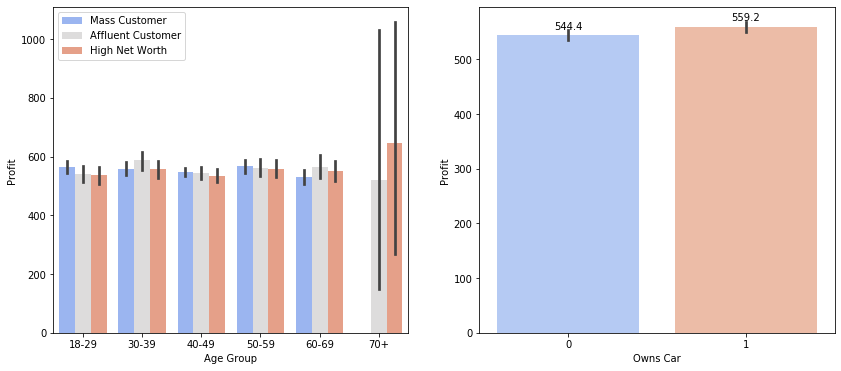

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

## SUBPLOT 1
plt.subplot(1,2,1)
sns.barplot(x = 'age_group', y = 'Profit',hue = 'wealth_segment', data = df_final, palette = 'coolwarm')
plt.legend(loc='upper left')
plt.xlabel("Age Group")
plt.ylabel("Profit")


## SUBPLOT 2
plt.subplot(1,2,2)
car = sns.barplot(x = 'owns_car', y = 'Profit' , data = df_final, palette = 'coolwarm')
for p in car.patches:
    plt.annotate(format(p.get_height(),'.1f'),
                 (p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,9),textcoords='offset points')
plt.xlabel("Owns Car")
plt.ylabel("Profit")

- Median age is almost same in all three types of wealth segments for all age groups except for 70+ age group.
- For 70+ age group, mass customers' data has many outliers, data for Affluent Customers and High Net Worth Customers is  positively skewed.
- In all the age groups (mostly Mass Customer segment) contributes highly to profit generated by company.
- Car owners contribute more to the company's profit as compared to the people having no car.


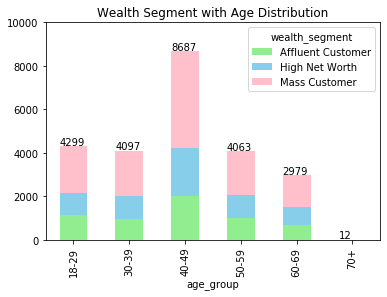

In [59]:
df_final.groupby('age_group')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True, color = ("lightgreen",'skyblue','pink'))

for i, v in enumerate(df_final.groupby('age_group') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
    
axes = plt.gca()
axes.set_ylim([0, 10000])
plt.title('Wealth Segment with Age Distribution')
plt.show()

Text(0, 0.5, 'Count')

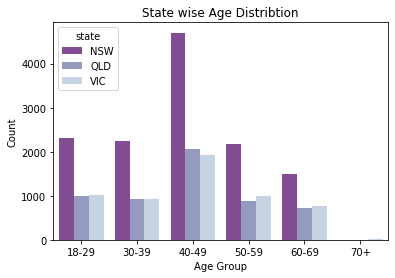

In [60]:
## Bar Plot
sns.countplot(x = 'age_group', hue = 'state',data = df_final,palette='BuPu_r')
plt.title("State wise Age Distribtion")
plt.xlabel("Age Group")
plt.ylabel("Count")

Maximum Bike related purchases are from New South Wales from 40-49 category.


Text(0, 0.5, 'Count')

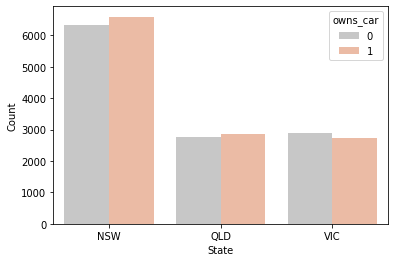

In [61]:
sns.countplot(x = 'state', hue = 'owns_car',data = df_final,palette='RdGy_r')
plt.xlabel("State")
plt.ylabel("Count")

- Maximum car owners belong to the state of New South Wales.
- New South Wales dominates the car ownership.
- The population of New South Wales is high as compared to other states which leads to large height of bar of New South Wales.

Text(0, 0.5, 'Profit')

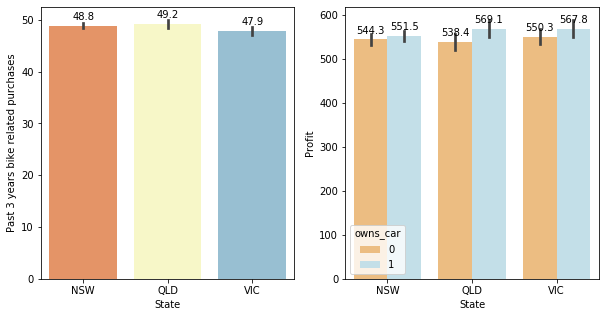

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

## SUBPLOT 1
plt.subplot(1,2,1)
pt1 = sns.barplot(x = 'state', y = 'past_3_years_bike_related_purchases',data = df_final ,palette='RdYlBu')
for p in pt1.patches:
    plt.annotate(format(p.get_height(),'.1f'),
                 (p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,9),textcoords='offset points')
plt.xlabel("State")
plt.ylabel("Past 3 years bike related purchases")

## SUBPLOT 2
plt.subplot(1,2,2)
pt2 = sns.barplot(x = 'state', y = 'Profit',hue='owns_car',data = df_final,palette='RdYlBu')
for q in pt2.patches:
    plt.annotate(format(q.get_height(),'.1f'),
                 (q.get_x()+q.get_width()/2.,q.get_height()),ha='center',va='center',xytext=(0,9),textcoords='offset points')
plt.xlabel("State")
plt.ylabel("Profit")

- Above plot indicates that maximum bike related purchases are from the state of Queensland.
- Maximum Profit contribution is by the state of Victoria.
- Car owners contibute more to the profit of company as compared to those of non-car owners.

Text(0, 0.5, 'Profit')

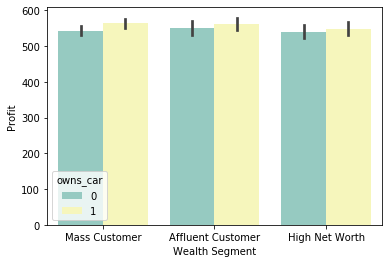

In [63]:
sns.barplot(x = 'wealth_segment', y ='Profit' ,hue = 'owns_car', data = df_final,palette='Set3')
plt.xlabel("Wealth Segment")
plt.ylabel("Profit")

Text(417.7583333333334, 0.5, 'Count')

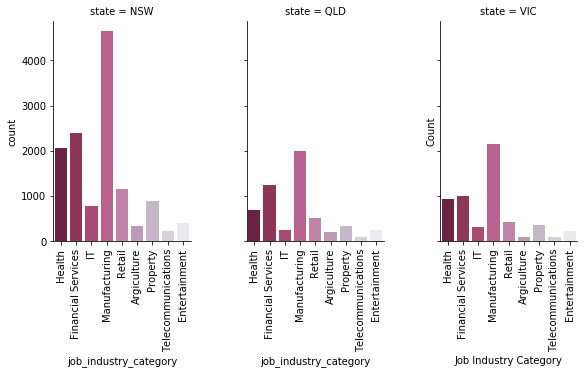

In [64]:
a = sns.catplot(x="job_industry_category", col="state",
                data=df_final, saturation=.5, kind="count",
                height=4, aspect=.7, palette = "PuRd_r")
a.set_xticklabels(rotation=90)
plt.xlabel("Job Industry Category")
plt.ylabel("Count")

- Each state's public is mostly employed in Manufacturing Industry followed by Financial Services.
- Telecommunications industry is the one with the least people employed in it.

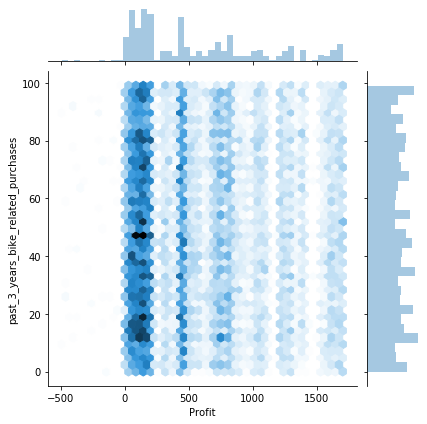

In [65]:
sns.jointplot(x='Profit',y='past_3_years_bike_related_purchases',data=df_final,kind='hex')

Text(0, 0.5, 'Past 3 years bike related purchases')

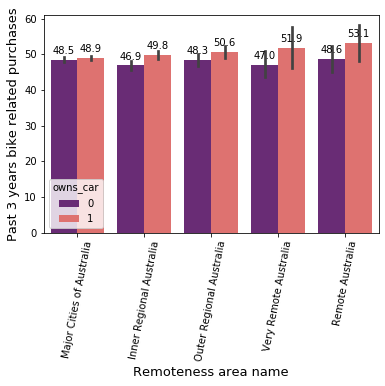

In [66]:
r = sns.barplot(x = 'RA_NAME_2016', y ='past_3_years_bike_related_purchases' ,hue='owns_car',data = df_final,
                palette = 'magma')
r.set_xticklabels(r.get_xticklabels(),rotation=79)
for p in r.patches:
    plt.annotate(format(p.get_height(),'.1f'),
                 (p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,9),textcoords='offset points')
plt.xlabel("Remoteness area name", fontsize = 13)
plt.ylabel("Past 3 years bike related purchases", fontsize = 13)

Above graph indicates that the Car Owners of Remote Australia dominate the bike purchases.In fact, both the car owners and     people not having any car contributes maximum to the bike purchases in Remote Australia. 

Text(0.5, 1.0, 'Monthly Profit Distribution')

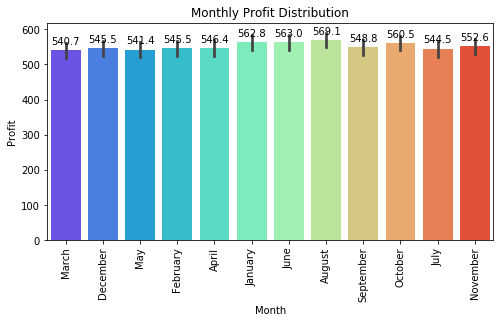

In [67]:
plt.figure(figsize=(8,4))
m = sns.barplot(x = 'Month', y ='Profit' , data = df_final,palette='rainbow')
m.set_xticklabels(m.get_xticklabels(),rotation=90)
for p in m.patches:
    plt.annotate(format(p.get_height(),'.1f'),
                 (p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,9),textcoords='offset points')
plt.xlabel("Month")
plt.ylabel("Profit")
plt.title("Monthly Profit Distribution")

- Maximum Profit by the company is earned in the month of August followed by January.
- Least profitable month is March.  

### *Assessing New Customers List*

In [68]:
new_cus = pd.read_excel("C:/Users/dhrit/Downloads/KPMG_VI_New_raw_data_update_final.xlsx",header=1,
                   sheet_name = "NewCustomerList")
new_cus.head()

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

         DOB                   job_title job_industry_category  \
0 1957-07-12             General Manager         Manufacturing   
1 1970-03-22         Structural Engineer              Property   
2 1974-08-28      Senior Cost Accountant    Financial Services   
3 1979-01-28  Account Representative III         Manufacturing   
4 1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  ...  state    country  \
0      Mass Customer                  N      Yes  ...    QLD  Australia   
1      Mass Customer                  N       No  ...    NSW  Australia   
2  Affluent Customer                  N       No  ...    VIC  Australia   
3  Affluent Customer                  N      Yes  ...    QLD  Australia   
4  Affluent Customer                  N       No  ...    NSW  Australia   

   property_valuation Unnamed: 16 Unnamed: 17  Unnamed: 18  Unnamed: 19  \
0                   6        0.56      0.7000       0.8750     0.743750   
1                  11        0.89      0.8900       1.1125     0.945625   
2                   5        1.01      1.0100       1.0100     1.010000   
3                   1        0.87      1.0875       1.0875     1.087500   
4                   9        0.52      0.5200       0.6500     0.650000   

   Unnamed: 20  Rank     Value  
0            1     1  1.718750  
1            1     1  1.718750  
2            1     1  1.718750  
3            4     4  1.703125  
4            4     4  1.703125  

[5 rows x 23 columns]

In [69]:
new_cus.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [70]:
## Filling the NA values in "Last Name" column of dataframe with the corresponding mode of this column:
new_cus['last_name'] = new_cus['last_name'].fillna(new_cus['last_name'].mode().iloc[0])

## Filling the NA values in "DOB" column of dataframe with the corresponding mode of this column:
new_cus['DOB'] = new_cus['DOB'].fillna(new_cus['DOB'].mode().iloc[0])

## Filling the NA values in "Job Title" column of dataframe with the corresponding mode of this column:
new_cus['job_title'] = new_cus['job_title'].fillna(new_cus['job_title'].mode().iloc[0])

## Filling the NA values in "Job Industry Category" column of dataframe with the corresponding mode of this column:
new_cus['job_industry_category'] = new_cus['job_industry_category'].fillna(new_cus['job_industry_category'].mode().iloc[0])


In [71]:
new_cus.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Unnamed: 16                            0
Unnamed: 17                            0
Unnamed: 18                            0
Unnamed: 19                            0
Unnamed: 20                            0
Rank                                   0
Value                                  0
dtype: int64

In [72]:
new_cus.shape

(1000, 23)

In [73]:
## Adding 'age' column to the New Customer dataset
new_cus['DOB'] = pd.to_datetime(new_cus['DOB'], errors='coerce')
now = pd.to_datetime('now')
now
new_cus['age'] = (now - new_cus['DOB']).astype('<m8[Y]')

new_cus.head()

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

         DOB                   job_title job_industry_category  \
0 1957-07-12             General Manager         Manufacturing   
1 1970-03-22         Structural Engineer              Property   
2 1974-08-28      Senior Cost Accountant    Financial Services   
3 1979-01-28  Account Representative III         Manufacturing   
4 1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  ...    country  \
0      Mass Customer                  N      Yes  ...  Australia   
1      Mass Customer                  N       No  ...  Australia   
2  Affluent Customer                  N       No  ...  Australia   
3  Affluent Customer                  N      Yes  ...  Australia   
4  Affluent Customer                  N       No  ...  Australia   

  property_valuation  Unnamed: 16 Unnamed: 17 Unnamed: 18  Unnamed: 19  \
0                  6         0.56      0.7000      0.8750     0.743750   
1                 11         0.89      0.8900      1.1125     0.945625   
2                  5         1.01      1.0100      1.0100     1.010000   
3                  1         0.87      1.0875      1.0875     1.087500   
4                  9         0.52      0.5200      0.6500     0.650000   

   Unnamed: 20  Rank     Value   age  
0            1     1  1.718750  64.0  
1            1     1  1.718750  51.0  
2            1     1  1.718750  47.0  
3            4     4  1.703125  43.0  
4            4     4  1.703125  56.0  

[5 rows x 24 columns]

In [74]:
## Creating Age-groups column:
bins = [18, 30, 40, 50, 60, 70, 90]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
new_cus['age_group'] = pd.cut(new_cus.age, bins, labels = labels,include_lowest = True)

## Dropping some irrelevant columns:
new_cus.drop(['country', 'DOB','deceased_indicator','Unnamed: 16','Unnamed: 17',
              'Unnamed: 18','Unnamed: 19','Unnamed: 20','Value'],axis=1,inplace=True)

new_cus.head()

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

                    job_title job_industry_category     wealth_segment  \
0             General Manager         Manufacturing      Mass Customer   
1         Structural Engineer              Property      Mass Customer   
2      Senior Cost Accountant    Financial Services  Affluent Customer   
3  Account Representative III         Manufacturing  Affluent Customer   
4           Financial Analyst    Financial Services  Affluent Customer   

  owns_car  tenure              address  postcode state  property_valuation  \
0      Yes      14     45 Shopko Center      4500   QLD                   6   
1       No      16    14 Mccormick Park      2113   NSW                  11   
2       No      10  5 Colorado Crossing      3505   VIC                   5   
3      Yes       5   207 Annamark Plaza      4814   QLD                   1   
4       No      19    115 Montana Place      2093   NSW                   9   

   Rank   age age_group  
0     1  64.0     60-69  
1     1  51.0     50-59  
2     1  47.0     40-49  
3     4  43.0     40-49  
4     4  56.0     50-59

In [75]:
## Merging New Customer List data with geographic remoteness of postcodes dataset
new_cus1 = pd.merge(new_cus,remote, on = "postcode")
new_cus1.head()

first_name last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie   Brister    Male                                   86   
1      Peria  Rantoull  Female                                    3   
2    Madison      Lars    Male                                   11   
3     Andrea    Pendle  Female                                   86   
4   Philbert     Bangs    Male                                   67   

                  job_title job_industry_category  wealth_segment owns_car  \
0           General Manager         Manufacturing   Mass Customer      Yes   
1         Financial Analyst    Financial Services   Mass Customer       No   
2          Health Coach III                Health   Mass Customer       No   
3       Associate Professor    Financial Services  High Net Worth      Yes   
4  Environmental Specialist                    IT   Mass Customer      Yes   

   tenure                  address  ... state property_valuation  Rank   age  \
0      14         45 Shopko Center  ...   QLD                  6     1  64.0   
1       4     8350 Moulton Terrace  ...   QLD                  4   120  47.0   
2      19   9503 New Castle Street  ...   QLD                  9   620  55.0   
3      13  31281 Meadow Valley Way  ...   QLD                  6   760  83.0   
4       6        02643 Moose Court  ...   QLD                  7   951  56.0   

   age_group POSTCODE_2017.1  RA_CODE_2016               RA_NAME_2016 RATIO  \
0      60-69          4500.0          30.0  Major Cities of Australia   1.0   
1      40-49          4500.0          30.0  Major Cities of Australia   1.0   
2      50-59          4500.0          30.0  Major Cities of Australia   1.0   
3        70+          4500.0          30.0  Major Cities of Australia   1.0   
4      50-59          4500.0          30.0  Major Cities of Australia   1.0   

   PERCENTAGE  
0       100.0  
1       100.0  
2       100.0  
3       100.0  
4       100.0  

[5 rows x 21 columns]

In [76]:
new_cus1.tail()

first_name last_name  gender  past_3_years_bike_related_purchases  \
1225      Datha  Fishburn  Female                                   15   
1226   Melloney     Temby  Female                                   17   
1227   Melloney     Temby  Female                                   17   
1228   Melloney     Temby  Female                                   17   
1229     Dickie   Cubbini    Male                                   30   

                         job_title job_industry_category     wealth_segment  \
1225           Office Assistant IV                Retail      Mass Customer   
1226  Budget/Accounting Analyst IV    Financial Services  Affluent Customer   
1227  Budget/Accounting Analyst IV    Financial Services  Affluent Customer   
1228  Budget/Accounting Analyst IV    Financial Services  Affluent Customer   
1229             Financial Advisor    Financial Services      Mass Customer   

     owns_car  tenure                   address  ... state property_valuation  \
1225       No       3            6 Caliangt Way  ...   VIC                 12   
1226      Yes      15  33475 Fair Oaks Junction  ...   QLD                  2   
1227      Yes      15  33475 Fair Oaks Junction  ...   QLD                  2   
1228      Yes      15  33475 Fair Oaks Junction  ...   QLD                  2   
1229      Yes      19        57666 Victoria Way  ...   QLD                  2   

      Rank   age  age_group POSTCODE_2017.1  RA_CODE_2016  \
1225   994  31.0      30-39          3079.0          20.0   
1226   997  67.0      60-69          4702.0          31.0   
1227   997  67.0      60-69          4702.0          32.0   
1228   997  67.0      60-69          4702.0          33.0   
1229   997  69.0      60-69          4215.0          30.0   

                   RA_NAME_2016     RATIO  PERCENTAGE  
1225  Major Cities of Australia  1.000000  100.000000  
1226   Inner Regional Australia  0.724128   72.412775  
1227   Outer Regional Australia  0.173932   17.393162  
1228           Remote Australia  0.101941   10.194061  
1229  Major Cities of Australia  1.000000  100.000000  

[5 rows x 21 columns]

In [77]:
new_cus1.isna().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
property_valuation                     0
Rank                                   0
age                                    0
age_group                              0
POSTCODE_2017.1                        0
RA_CODE_2016                           0
RA_NAME_2016                           0
RATIO                                  0
PERCENTAGE                             0
dtype: int64

#### Numerical Variables' Distribution :

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8B0A2BE88>,
      dtype=object)

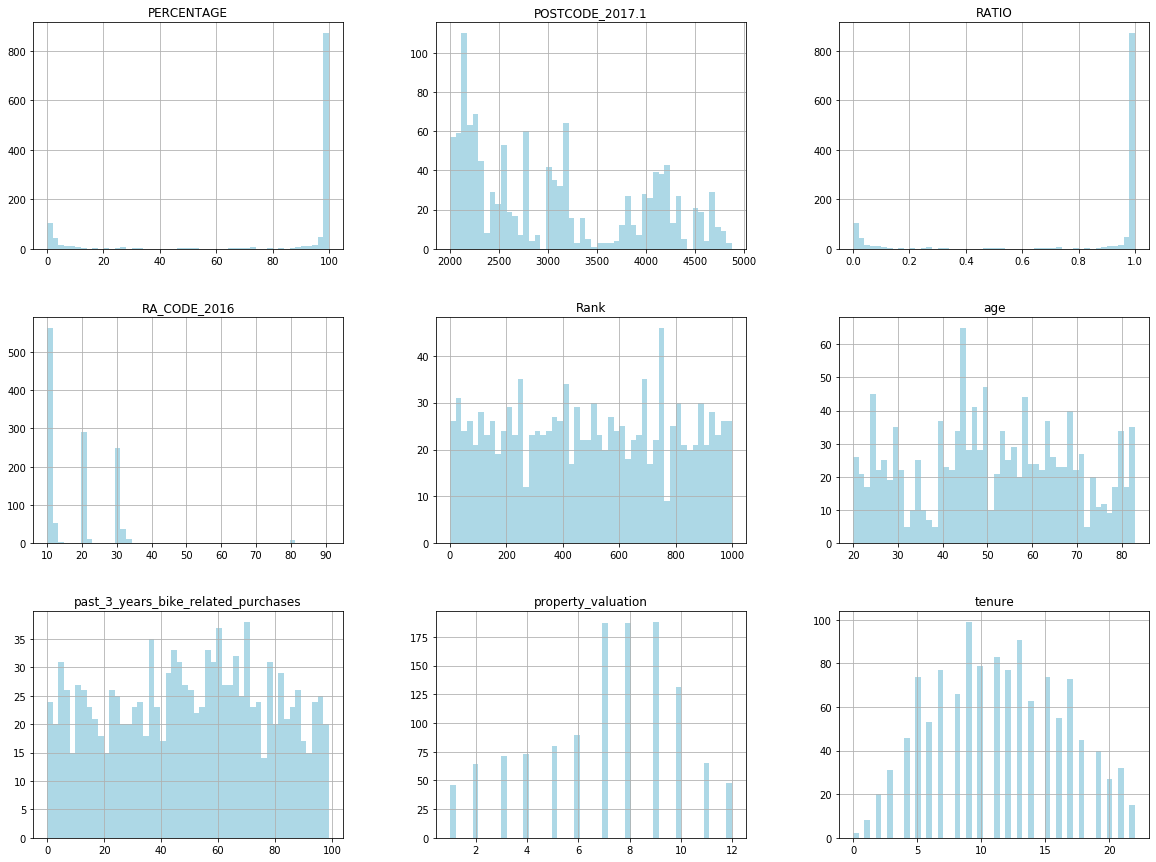

In [78]:
new_cus1.hist(bins=50, figsize=(20,15),color='lightblue')

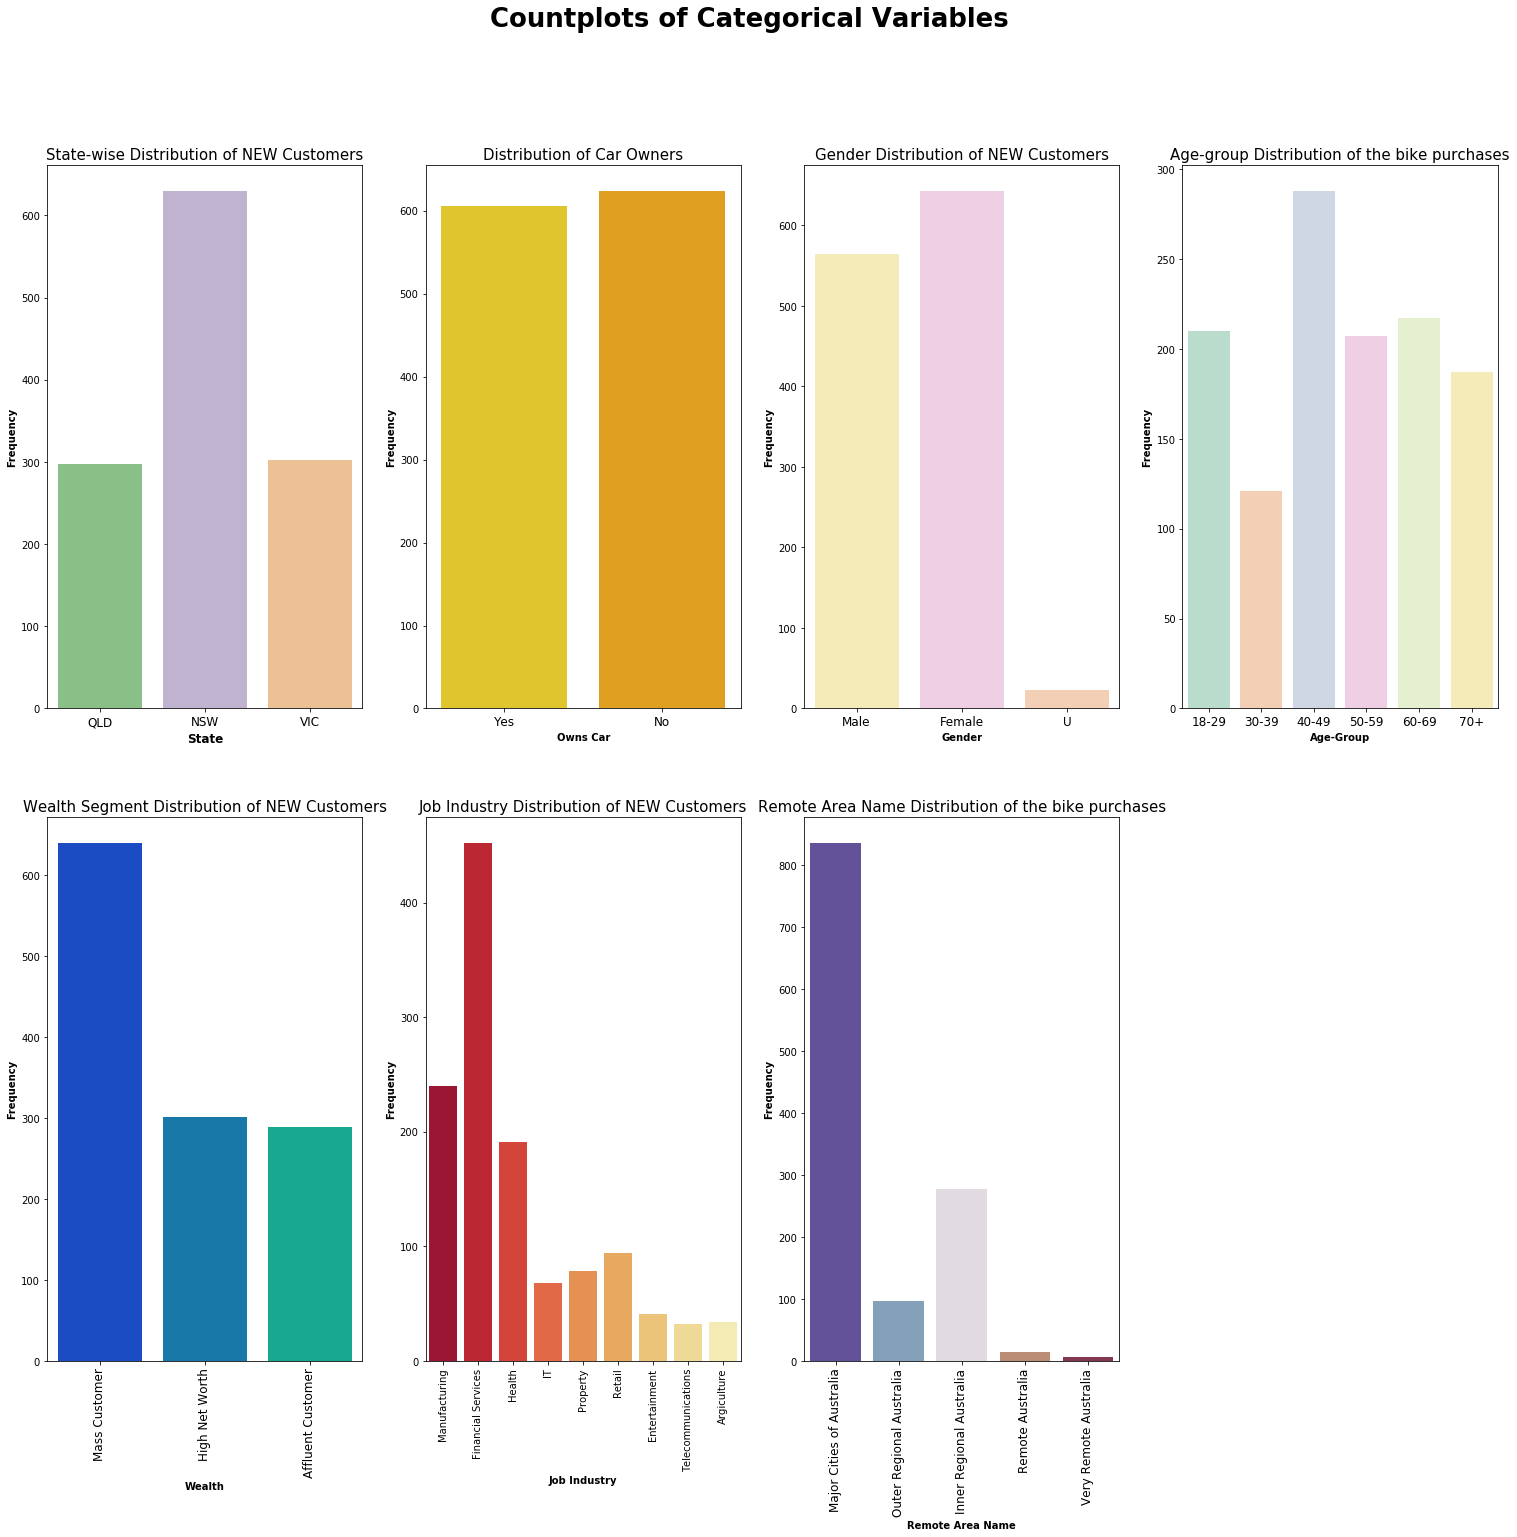

In [79]:
fig, ax = plt.subplots(figsize=(26, 22))
fig.suptitle('Countplots of Categorical Variables', fontsize=26, weight='bold')

# STATE BASED SUBPLOT
plt.subplot(2, 4, 1)
sns.countplot(new_cus1['state'],palette = 'Accent', orient = 'h')
plt.xticks(fontsize = 12)
plt.title("State-wise Distribution of NEW Customers",fontsize = 15);
plt.xlabel("State",fontsize=12, weight = 'bold');
plt.ylabel("Frequency", weight = 'bold');

# CAR OWNER BASED SUBPLOT
plt.subplot(2,4,2)
sns.countplot(new_cus1['owns_car'], palette = 'Wistia', orient = 'h')
plt.xticks(fontsize = 12)
plt.title("Distribution of Car Owners" ,fontsize = 15);
plt.xlabel("Owns Car", weight = 'bold');
plt.ylabel("Frequency", weight = 'bold');

# GENDER BASED SUBPLOT
plt.subplot(2, 4, 3)
sns.countplot(new_cus1['gender'], palette = 'Pastel2_r', orient = 'h')
plt.xticks(fontsize = 12)
plt.title("Gender Distribution of NEW Customers",fontsize = 15);
plt.xlabel("Gender", weight = 'bold');
plt.ylabel("Frequency", weight = 'bold');

# AGE-GROUP BASED SUBPLOT
plt.subplot(2,4,4)
p1 = sns.countplot(new_cus1['age_group'],palette = 'Pastel2', orient = 'h')
p1.set_xticklabels(p1.get_xticklabels(), fontsize = 12)
plt.title('Age-group Distribution of the bike purchases',fontsize = 15);
plt.xlabel("Age-Group", weight = 'bold');
plt.ylabel("Frequency", weight = 'bold');

# WEALTH SEGMENT BASED SUBPLOT
plt.subplot(2, 4, 5)
p2 = sns.countplot(new_cus1['wealth_segment'], palette = 'winter', orient = 'h')
p2.set_xticklabels(p2.get_xticklabels(), fontsize = 12, rotation=90)
plt.title("Wealth Segment Distribution of NEW Customers",fontsize = 15);
plt.xlabel("Wealth", weight = 'bold');
plt.ylabel("Frequency", weight = 'bold');

# JOB INDUSTRY CATEGORY BASED SUBPLOT
plt.subplot(2, 4, 6)
p3 = sns.countplot(new_cus1['job_industry_category'], palette = 'YlOrRd_r', orient = 'h')
p3.set_xticklabels(p3.get_xticklabels(), fontsize = 15, rotation=90, size = 10)
plt.title("Job Industry Distribution of NEW Customers",fontsize = 15);
plt.xlabel("Job Industry", weight = 'bold');
plt.ylabel("Frequency", weight = 'bold');


# REMOTE AREA NAME BASED SUBPLOT
plt.subplot(2,4,7)
p4 = sns.countplot(new_cus1['RA_NAME_2016'],palette = 'twilight_shifted', orient = 'h')
p4.set_xticklabels(p4.get_xticklabels(), fontsize = 12, rotation=90)
plt.title('Remote Area Name Distribution of the bike purchases',fontsize = 15);
plt.xlabel("Remote Area Name", weight = 'bold');
plt.ylabel("Frequency", weight = 'bold');

Above plot can lead us to following conclusions:

- Maximum number of New customers are from the state of New South Wales, Australia.
- Most of the new customers does not own any car.
- Number of Female customers are more than the male customers.
- Most of the customers belong to **Financial Services**.
- Mass customers are the largest contributors for increasing sales of the bikes.
- Customers of the Sprocket Central Pty. Limited mainly belong to Major Cities Of Australia (in terms of Remoteness).
- Maximum number of customers belong to the age-group of 40-49.

Text(0.5, 1.0, 'Age-Group Distribution')

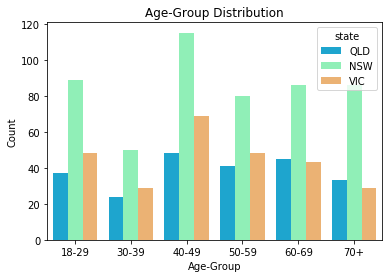

In [80]:
## Plotting Age-Group Distribution 
sns.countplot(x='age_group',hue='state',data=new_cus,palette='rainbow')
plt.xlabel('Age-Group')
plt.ylabel('Count')
plt.title("Age-Group Distribution")

Text(0.5, 1.0, 'State wise distribution of New customers')

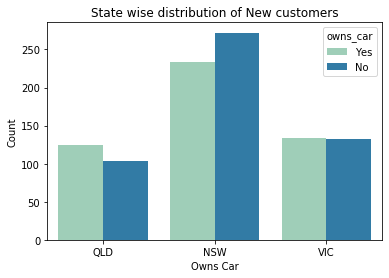

In [81]:
## Plot of State wise distribution of New customers
sns.countplot(x='state',hue='owns_car',data=new_cus,palette='YlGnBu')
plt.xlabel('Owns Car')
plt.ylabel('Count')
plt.title("State wise distribution of New customers")

Text(0.5, 1.0, 'Bike Purchases distribution by wealth segment')

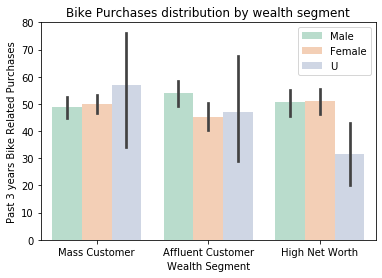

In [82]:
## Plot of Bike Purchases distribution by wealth segment
sns.barplot(x='wealth_segment',y = 'past_3_years_bike_related_purchases',hue='gender',data=new_cus,palette='Pastel2')
plt.legend(loc = 'upper right')
plt.xlabel('Wealth Segment')
plt.ylabel('Past 3 years Bike Related Purchases')
plt.title('Bike Purchases distribution by wealth segment')

Text(0.5, 1.0, 'Job Industry Category Distribution')

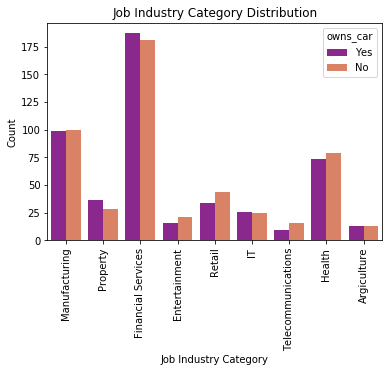

In [83]:
## Plot of Job Industry Category Distribution
ct = sns.countplot(x='job_industry_category',hue='owns_car',data=new_cus,palette='plasma')
ct.set_xticklabels(ct.get_xticklabels(),rotation=90)
plt.xlabel('Job Industry Category')
plt.ylabel('Count')
plt.title('Job Industry Category Distribution')

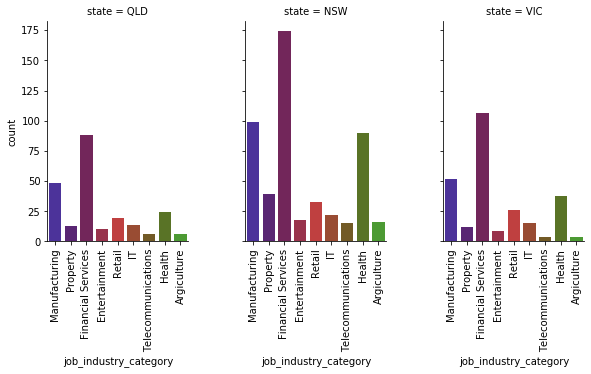

In [84]:
## Plot of Job Industry Category by state
aj = sns.catplot(x="job_industry_category", col="state",
                data=new_cus, saturation=.5, kind="count",
                height=4, aspect=.7, palette='brg')
aj.set_xticklabels(rotation=90)

Most of the customers are employed in Financial Services.

Text(0, 0.5, 'Past 3 years bike related purchases')

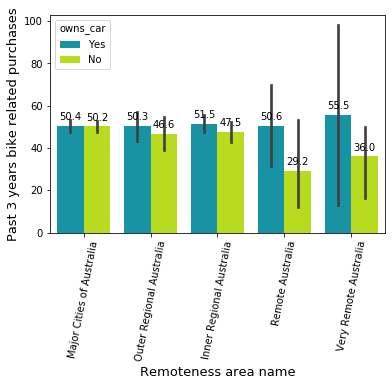

In [85]:
rem = sns.barplot(x = 'RA_NAME_2016', y ='past_3_years_bike_related_purchases' ,hue='owns_car',data = new_cus1,
                palette = 'nipy_spectral')
rem.set_xticklabels(rem.get_xticklabels(),rotation=79)
for p in rem.patches:
    plt.annotate(format(p.get_height(),'.1f'),
                 (p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,9),textcoords='offset points')
plt.xlabel("Remoteness area name", fontsize = 13)
plt.ylabel("Past 3 years bike related purchases", fontsize = 13)

Most of the bike purchases is done by Car Owners living in Very Remote Australia

## *Step 3 : Model Development*

### *Method 1 : RFM (Recency-Frequency-Monetary) Analysis :*

In [86]:
#Create a RFM Table from the merged data set:

rfmTable = df_final.groupby('customer_id').agg({
    'Recency': lambda x: x.min().days,
    'product_id': lambda x: len(x),
    'Profit': lambda x: x.sum()
})

rfmTable.rename(columns={ 
    'product_id': 'Frequency', 
    'Profit': 'Monetary_value'
    }, inplace=True
)

rfmTable.head()

Recency  Frequency  Monetary_value
customer_id                                    
1                  7         11         3018.09
2                128          3         2226.26
4                195          4          441.14
5                 16          6         2394.94
6                 64         10         7893.10

In [87]:
rfmTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3485 entries, 1 to 3500
Data columns (total 3 columns):
Recency           3485 non-null int64
Frequency         3485 non-null int64
Monetary_value    3485 non-null float64
dtypes: float64(1), int64(2)
memory usage: 108.9 KB


In [88]:
rfmTable.shape

(3485, 3)

In [89]:
rfmTable.describe()

Recency    Frequency  Monetary_value
count  3485.000000  3485.000000     3485.000000
mean     60.715065     6.925968     3822.224924
std      57.705998     3.887367     2678.582777
min       0.000000     1.000000       15.080000
25%      17.000000     4.000000     2069.640000
50%      44.000000     6.000000     3259.410000
75%      85.000000     8.000000     4905.530000
max     353.000000    33.000000    22842.540000

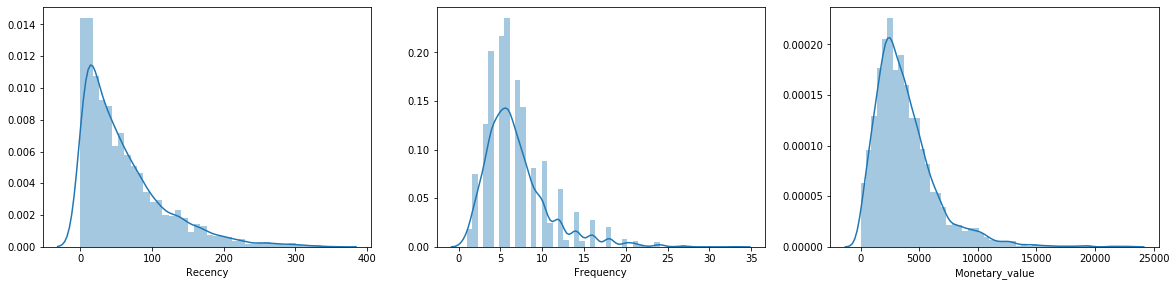

In [90]:
#Inspecting the distribution of Recency, Frequency and Monetary:
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.distplot(rfmTable['Recency'])
plt.subplot(3, 3, 2)
sns.distplot(rfmTable['Frequency'])
plt.subplot(3, 3, 3)
sns.distplot(rfmTable['Monetary_value'])

- Data of Recency is right-skewed.
- Frequency data have a nearly Normal Distribution.
- Monetary Value data is positively-skewed to some extent.

Text(0, 0.5, 'Frequency')

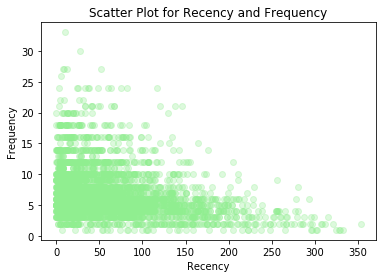

In [91]:
## Scatter Plot for Recency and Frequency
plt.scatter(x=rfmTable['Recency'], y = rfmTable['Frequency'],
            color = 'lightgreen',
            marker = 'o', alpha = 0.3)

plt.title('Scatter Plot for Recency and Frequency') 
plt.xlabel('Recency')
plt.ylabel('Frequency')

Recency and Frequency have a correlation of -0.395046 which is also visible from above graph. So, most frequent purchases are the least recent ones. 

Text(0, 0.5, 'Frequency')

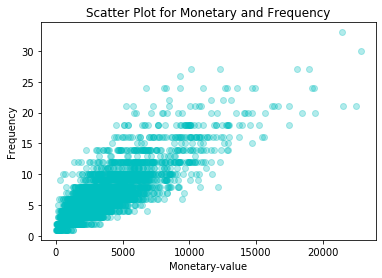

In [92]:
## Scatter Plot for Monetary and Frequency
plt.scatter(x=rfmTable['Monetary_value'], y = rfmTable['Frequency'],
            color = 'c',
            marker = 'o', alpha = 0.3)

plt.title('Scatter Plot for Monetary and Frequency') 
plt.xlabel('Monetary-value')
plt.ylabel('Frequency')

Monetary-value and Frequency have a high positive correlation of 0.712230. 

In [93]:
quart = rfmTable.quantile(q=[0.25,0.50,0.75])
quart

Recency  Frequency  Monetary_value
0.25     17.0        4.0         2069.64
0.50     44.0        6.0         3259.41
0.75     85.0        8.0         4905.53

In [98]:
## Converting quartiles to dictionary:
quart = quart.to_dict()
quart

{'Recency': {0.25: 17.0, 0.5: 44.0, 0.75: 85.0},
 'Frequency': {0.25: 4.0, 0.5: 6.0, 0.75: 8.0},
 'Monetary_value': {0.25: 2069.64, 0.5: 3259.41, 0.75: 4905.530000000001}}

In [94]:
## In case of recency, the lower , the better and therefore our categorization system must be reversed
def Rclass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
## For Frequency and Monetary-value:
def FMclass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    
## Creating NEW RFM Table with RFM Scores:    
rfm_new = rfmTable
rfm_new['R_Score'] = rfm_new['Recency'].apply(Rclass, args=('Recency',quart))
rfm_new['F_Score'] = rfm_new['Frequency'].apply(Rclass, args=('Frequency',quart))
rfm_new['M_Score'] = rfm_new['Monetary_value'].apply(Rclass, args=('Monetary_value',quart))
rfm_new.head()

Recency  Frequency  Monetary_value  R_Score  F_Score  M_Score
customer_id                                                               
1                  7         11         3018.09        1        4        2
2                128          3         2226.26        4        1        2
4                195          4          441.14        4        1        1
5                 16          6         2394.94        1        2        2
6                 64         10         7893.10        3        4        4

In [95]:
#Concatinating RFM Scores into one column, namely, 'Total_Score':
rfm_new['RFM_class'] = rfm_new.R_Score.map(str) + rfm_new.F_Score.map(str) + rfm_new.M_Score.map(str)
rfm_new['Total_Score'] = rfm_new['R_Score'] + rfm_new['F_Score'] + rfm_new['M_Score']
rfm_new.head()

Recency  Frequency  Monetary_value  R_Score  F_Score  M_Score  \
customer_id                                                                  
1                  7         11         3018.09        1        4        2   
2                128          3         2226.26        4        1        2   
4                195          4          441.14        4        1        1   
5                 16          6         2394.94        1        2        2   
6                 64         10         7893.10        3        4        4   

            RFM_class  Total_Score  
customer_id                         
1                 142            7  
2                 412            7  
4                 411            6  
5                 122            5  
6                 344           11

In [96]:
# Filter out Top/Best customers:
rfm_new[rfm_new['RFM_class']=='111'].sort_values('Monetary_value', ascending=False).head()

Recency  Frequency  Monetary_value  R_Score  F_Score  M_Score  \
customer_id                                                                  
2748               6          4         2059.83        1        1        1   
1219               4          3         2015.72        1        1        1   
1333               7          3         1924.18        1        1        1   
3338               4          4         1912.53        1        1        1   
2708              11          3         1879.32        1        1        1   

            RFM_class  Total_Score  
customer_id                         
2748              111            3  
1219              111            3  
1333              111            3  
3338              111            3  
2708              111            3

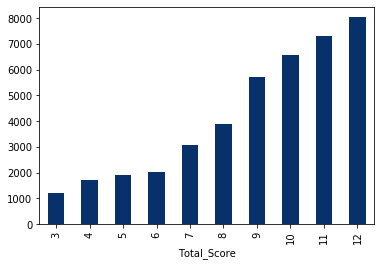

In [97]:
rfm_new.groupby('Total_Score').agg('Monetary_value').mean().plot(kind='bar', colormap='Blues_r')

Best Customers having Total Score of 3 have the average Monetary Value of 1000.

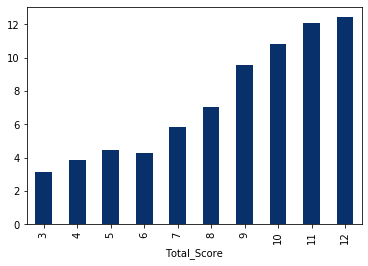

In [98]:
rfm_new.groupby('Total_Score').agg('Frequency').mean().plot(kind='bar', colormap='Blues_r')

Best Customers having Total Score of 3 have the average Frequency Value of 3.

Text(0.5, 0, 'RFM_class')

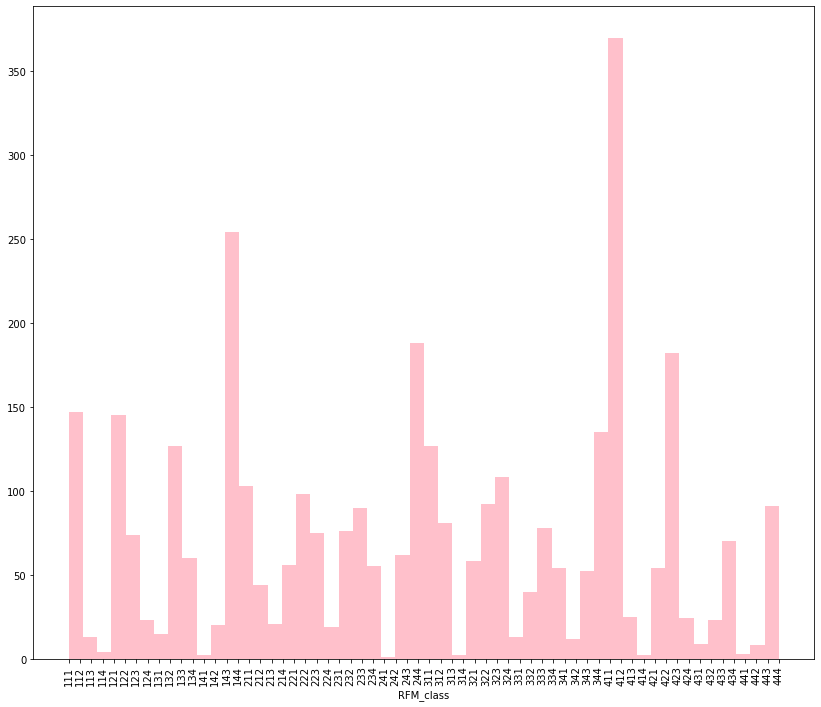

In [99]:
#Checking the distribution of RFM_class:
plt.figure(figsize=(14,12))
plt.hist(x='RFM_class',bins=50,data=rfm_new.sort_values(by='RFM_class'), color = 'pink')
plt.xticks(rotation=90)
plt.xlabel('RFM_class')

### *Assign loyalty level to each customer:*

- **Platinum:** Loyal Customers, they are the ones with highest score of RFM (i.e, 111) and very important for increasing the                 future sales. They have most recent purchases with high frequency and monetary value.
- **Gold:** Customers having the potential to become Platinum customers.They recently shopped and their purchase frequency is               quite good. 
- **Silver:** Customers who didn't purchased recently.
- **Lost:** Customers who haven't contributed to the sales of the company for a long time.

In [100]:
## Adding Loyalty Level column to the table:
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(rfm_new.Total_Score, q = 4, labels = Loyalty_Level)
rfm_new['Loyalty'] = Score_cuts.values
rfm_new.reset_index().head()

customer_id  Recency  Frequency  Monetary_value  R_Score  F_Score  M_Score  \
0            1        7         11         3018.09        1        4        2   
1            2      128          3         2226.26        4        1        2   
2            4      195          4          441.14        4        1        1   
3            5       16          6         2394.94        1        2        2   
4            6       64         10         7893.10        3        4        4   

  RFM_class  Total_Score   Loyalty  
0       142            7      Gold  
1       412            7      Gold  
2       411            6  Platinum  
3       122            5  Platinum  
4       344           11    Bronze

In [101]:
rfm_new.groupby('Loyalty').agg({
'Recency': 'mean',
'Frequency': 'mean',
'Monetary_value': ['mean','count']
}).round(1)

Recency Frequency Monetary_value      
            mean      mean           mean count
Loyalty                                        
Platinum    58.4       4.2         1884.9  1310
Gold        64.4       5.9         3065.0   529
Silver      55.0       8.3         4802.5  1030
Bronze      72.0      11.4         6953.3   616

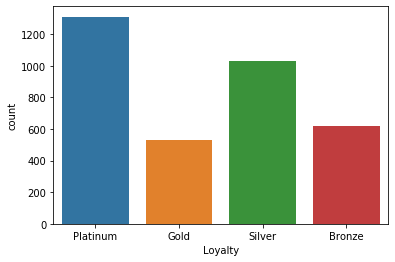

In [102]:
sns.countplot(x = 'Loyalty',data = rfm_new)

Most of the customers belong to Platinum category followed by Silver, Bronze and Gold Category customers respectively.

### *Inspecting loyal segmentation:*

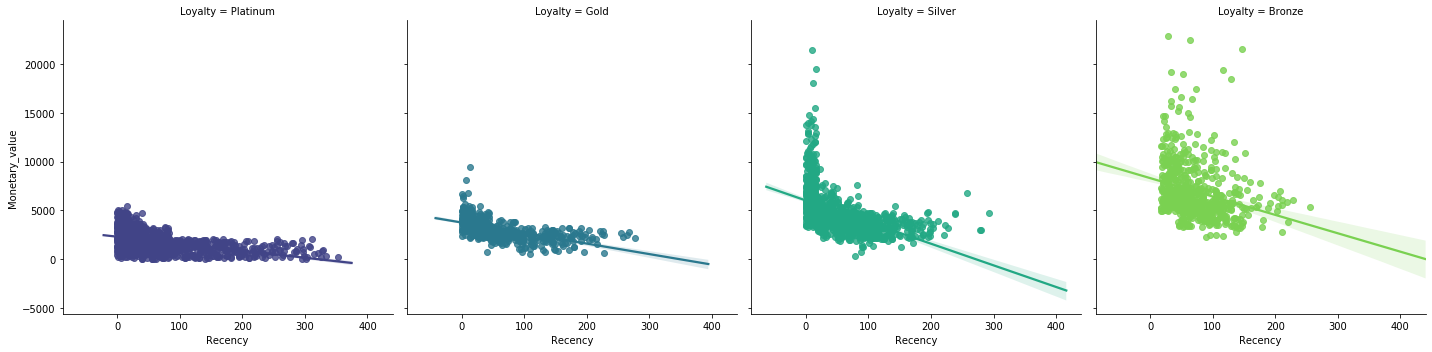

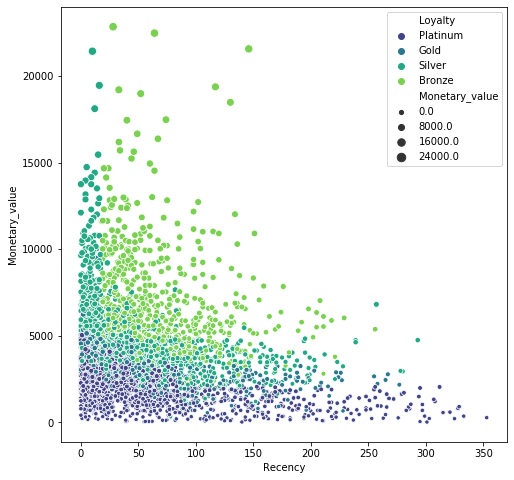

In [103]:
# Monetary vs Recency for each segment
sns.lmplot(x='Recency', y='Monetary_value', data=rfm_new, col='Loyalty', hue='Loyalty', fit_reg=True,palette='viridis')

# Monetary vs Recency (combined)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(x='Recency', y='Monetary_value', data=rfm_new, hue='Loyalty', size='Monetary_value',palette='viridis')

Most recent customers contributes to the profit of the company more as compared to the past customers. Also, Bronze and Silver Customers have high Monetary value as compared to others.

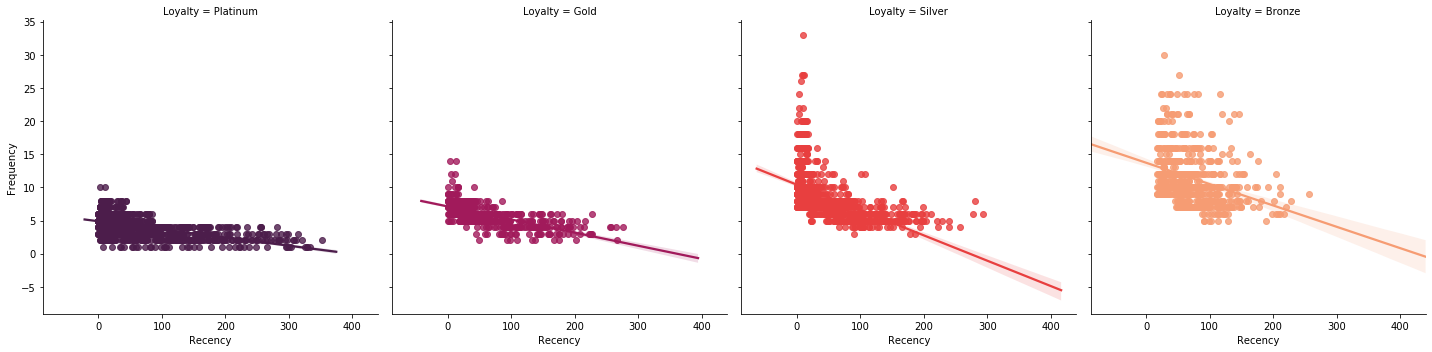

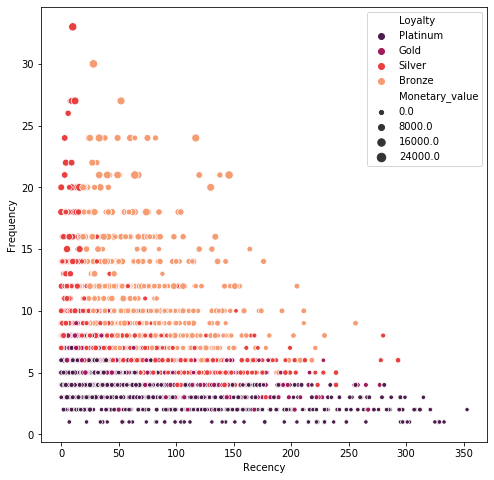

In [104]:
# Frequency vs Recency for each segment
sns.lmplot(x='Recency', y='Frequency', data = rfm_new, col='Loyalty', hue='Loyalty', fit_reg=True, palette='rocket')

# Frequency vs Recency (combined)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(x='Recency', y='Frequency', data = rfm_new, hue='Loyalty', size='Monetary_value',palette='rocket')

Most recent customers are least frequent to visit the company i.e., Platinum members.

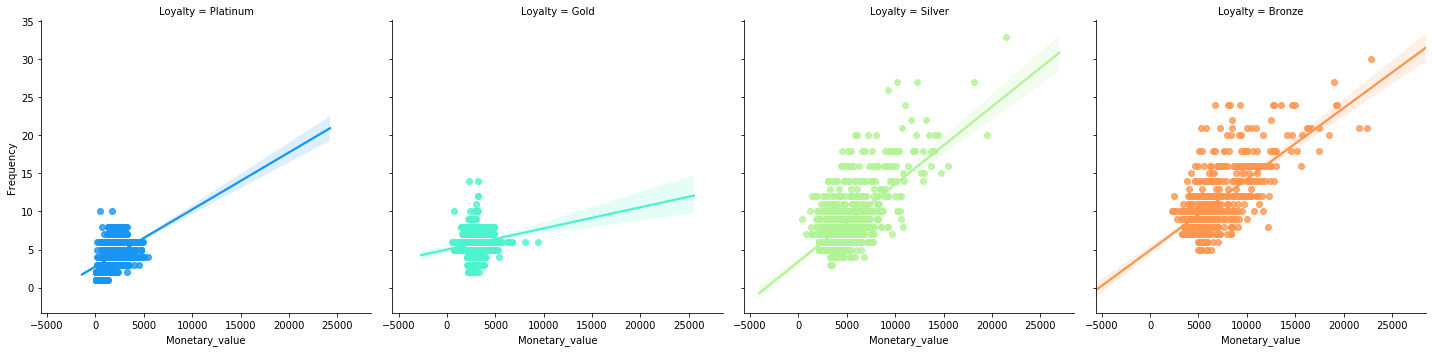

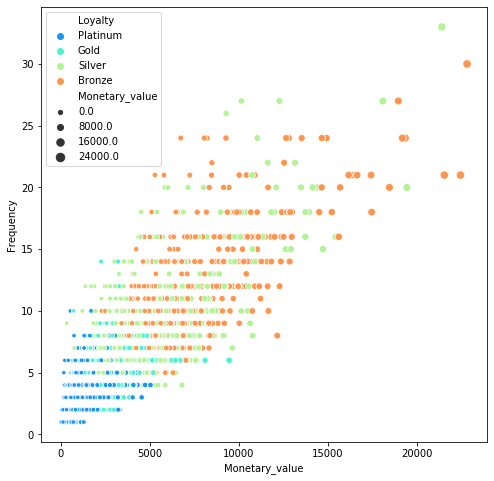

In [105]:
# Monetary vs Frequency for each segment
sns.lmplot(x='Monetary_value', y='Frequency', data=rfm_new, col='Loyalty', hue='Loyalty', fit_reg=True,palette='rainbow')

# Monetary vs Frequency (combined)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(x='Monetary_value', y='Frequency', data=rfm_new, hue='Loyalty', size='Monetary_value',palette='rainbow')

Silver and Bronze customers have very high Monetary value with some outliers present.

#### *Merging RFM Table with our Final dataset :*

In [106]:
df_final1 = pd.merge(df_final, rfm_new, on='customer_id')
df_final1.head()

product_id  customer_id           brand product_line product_class  \
0          23            1  Norco Bicycles     Mountain           low   
1          11            1  Giant Bicycles     Standard          high   
2           9            1      OHM Cycles         Road        medium   
3          47            1   Trek Bicycles         Road           low   
4           2            1           Solex     Standard        medium   

  product_size  Profit Recency_x  gender  past_3_years_bike_related_purchases  \
0        small   75.75  278 days  Female                                   93   
1       medium  509.97  276 days  Female                                   93   
2       medium   75.14   21 days  Female                                   93   
3        small  189.28  233 days  Female                                   93   
4       medium   17.87  312 days  Female                                   93   

   ... age_group Recency_y  Frequency  Monetary_value  R_Score F_Score  \
0  ...     60-69         7         11         3018.09        1       4   
1  ...     60-69         7         11         3018.09        1       4   
2  ...     60-69         7         11         3018.09        1       4   
3  ...     60-69         7         11         3018.09        1       4   
4  ...     60-69         7         11         3018.09        1       4   

   M_Score RFM_class  Total_Score  Loyalty  
0        2       142            7     Gold  
1        2       142            7     Gold  
2        2       142            7     Gold  
3        2       142            7     Gold  
4        2       142            7     Gold  

[5 rows x 31 columns]

In [107]:
df_final1.dtypes

product_id                                       int64
customer_id                                      int64
brand                                           object
product_line                                    object
product_class                                   object
product_size                                    object
Profit                                         float64
Recency_x                              timedelta64[ns]
gender                                          object
past_3_years_bike_related_purchases              int64
job_industry_category                           object
wealth_segment                                  object
owns_car                                         int64
tenure                                         float64
age                                            float64
state                                           object
RA_CODE_2016                                   float64
RA_NAME_2016                                    object
RATIO     

#### *State-Wise Count of the cutomers according to their Loyalty:*

In [108]:
state_count = df_final1.groupby(['state','Loyalty']).agg({'age': lambda x: len(x)})
state_count.rename(columns={'age':'Count'},inplace=True)
state_count['Count'] = state_count['Count'].astype(int)
state_count

Count
state Loyalty        
NSW   Platinum   3019
      Gold       1596
      Silver     4595
      Bronze     3705
QLD   Platinum   1014
      Gold        679
      Silver     1889
      Bronze     2015
VIC   Platinum   1433
      Gold        822
      Silver     2069
      Bronze     1301

Most promising customers, i.e., Platinum Customers reside in the state of New South Wales.

Text(0, 0.5, 'Count')

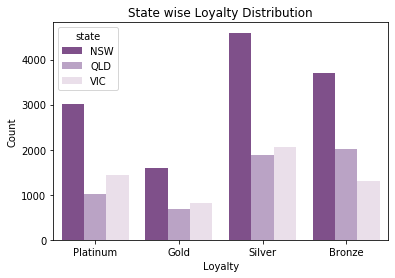

In [109]:
sns.countplot(hue='state', x = 'Loyalty',data=df_final1, palette=sns.color_palette("PRGn"))
plt.title('State wise Loyalty Distribution')
plt.xlabel('Loyalty')
plt.ylabel("Count")

Text(0, 0.5, 'Count')

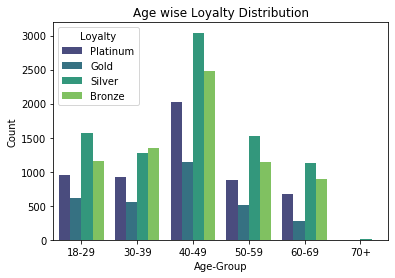

In [110]:
sns.countplot(x='age_group', hue = 'Loyalty',data=df_final1, palette='viridis')
plt.title('Age wise Loyalty Distribution')
plt.xlabel('Age-Group')
plt.ylabel("Count")

Text(0, 0.5, 'Count')

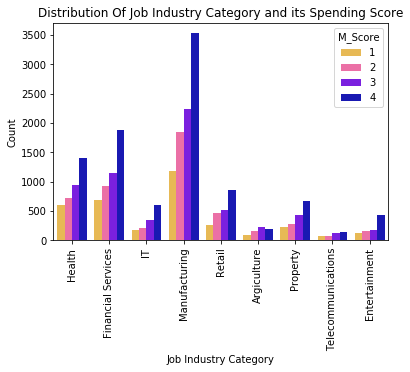

In [111]:
job = sns.countplot(x='job_industry_category', hue = 'M_Score',data=df_final1, palette='gnuplot2_r')
job.set_xticklabels(job.get_xticklabels(),rotation=90)
plt.title("Distribution Of Job Industry Category and its Spending Score")
plt.xlabel('Job Industry Category')
plt.ylabel('Count')

#### *Model Development Using K-Means Clustering :*

In [112]:
## Before taking log transformation of above data, we need to handle negative and zero values 
def rectify_num(n):
    if n <= 0:
        return 1
    else:
        return n
    
## Apply rectify_num function to Recency and Monetary columns 
rfmTable['Recency'] = rfmTable['Recency'].apply(rectify_num)
rfmTable['Monetary_value'] = rfmTable['Monetary_value'].apply(rectify_num)

#Perform Log transformation to bring data into normal or near normal distribution
log_data = rfmTable[['Recency', 'Frequency', 'Monetary_value']].apply(np.log, axis = 1).round(3)
log_data.head()

Recency  Frequency  Monetary_value
customer_id                                    
1              1.946      2.398           8.012
2              4.852      1.099           7.708
4              5.273      1.386           6.089
5              2.773      1.792           7.781
6              4.159      2.303           8.974

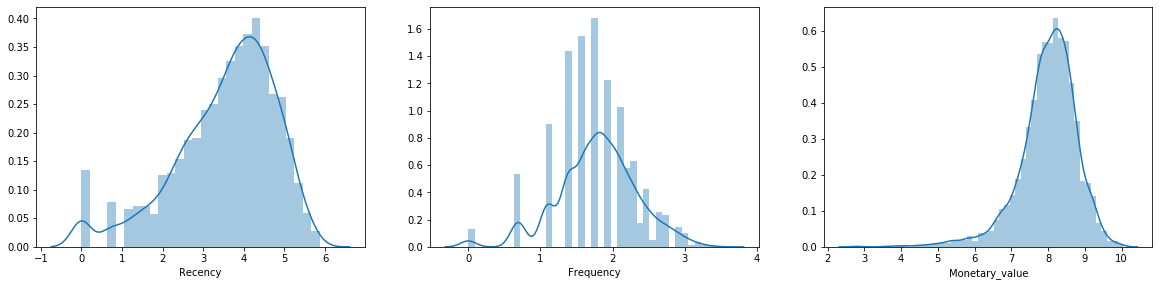

In [113]:
## Inspecting the distribution of Recency, Frequency and Monetary:
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.distplot(log_data['Recency'])
plt.subplot(3, 3, 2)
sns.distplot(log_data['Frequency'])
plt.subplot(3, 3, 3)
sns.distplot(log_data['Monetary_value'])

Now, the distribution of all three features has become near-normal.

In [114]:
# Initialsing the StandardScaler
scaler = StandardScaler()

# First we fit the data and then we will transform it
scaler.fit(log_data)
rfm_norm = scaler.transform(log_data)

# Checking if the values are correct or not
print(rfm_norm.mean(axis = 0).round(2))
print(rfm_norm.std(axis = 0).round(2))

# Printing standardized values
pd.DataFrame(rfm_norm).head(10)

[-0.  0. -0.]
[1. 1. 1.]


0         1         2
0 -1.297161  1.107807  0.022891
1  1.051160 -1.264685 -0.357556
2  1.391368 -0.740508 -2.383684
3 -0.628867  0.001009 -0.266198
4  0.491151  0.934299  1.226804
5  1.601472 -1.264685 -3.253455
6 -0.371893  2.199993  1.955159
7  0.651154  0.001009 -0.288725
8  0.224480  0.001009  0.256916
9  0.528323  0.282275  0.223126

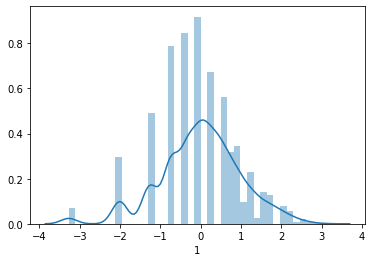

In [115]:
sns.distplot(pd.DataFrame(rfm_norm)[1])

So, the distribution has now become near normal and its also standardised to mean zero and variance unity.

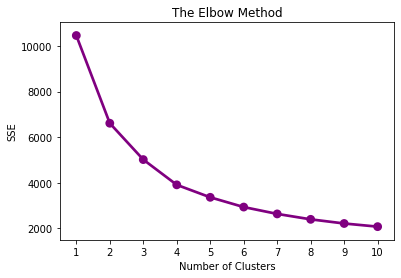

In [116]:
# Define an empty list for within cluster Sum of Squared Errors
SSE = {}  
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_norm)
    #Sum of Squared Errors to closest cluster centroid
    SSE[k] = kmeans.inertia_  
    
# Plotting the figure
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
sns.pointplot(x=list(SSE.keys()), y=list(SSE.values()), color='purple')

Here we can see an elbow or dip at 4th cluster after which the SSE tends to stabilize. So, number of optimal clusters for the dataset is 4.

In [117]:
# We code the model
model = KMeans(n_clusters=4, random_state=42) 

# We fit our normalized table
model.fit(rfm_norm) 

cluster_labels = model.labels_
# Checking shape of the resultant model
model.labels_.shape

(3485,)

In [118]:
# Let's now add the cluster number to our RFM original table
rfmTable["ClusterNum"] = model.labels_

# Printing the head of table
rfmTable.head(15)

Recency  Frequency  Monetary_value  R_Score  F_Score  M_Score  \
customer_id                                                                  
1                  7         11         3018.09        1        4        2   
2                128          3         2226.26        4        1        2   
4                195          4          441.14        4        1        1   
5                 16          6         2394.94        1        2        2   
6                 64         10         7893.10        3        4        4   
7                253          3          220.11        4        1        1   
8                 22         20        14133.88        2        4        4   
9                 78          6         2353.11        3        2        2   
11                46          6         3638.84        3        2        3   
12                67          7         3540.03        3        3        3   
13                27          7         4337.38        2        3        3   
14                47          4         2290.50        3        1        2   
15                35          6         1728.39        2        2        1   
16                99          5         4521.84        4        2        3   
17                 1          5         2015.61        1        2        1   

            RFM_class  Total_Score   Loyalty  ClusterNum  
customer_id                                               
1                 142            7      Gold           0  
2                 412            7      Gold           2  
4                 411            6  Platinum           3  
5                 122            5  Platinum           0  
6                 344           11    Bronze           1  
7                 411            6  Platinum           3  
8                 244           10    Bronze           1  
9                 322            7      Gold           2  
11                323            8    Silver           2  
12                333            9    Silver           2  
13                233            8    Silver           1  
14                312            6  Platinum           2  
15                221            5  Platinum           2  
16                423            9    Silver           2  
17                121            4  Platinum           0

In [119]:
rfmTable.groupby(['ClusterNum']).agg({
'Recency': 'mean'
,
'Frequency': 'mean'
,
'Monetary_value': ['mean'
,
'count'],
}).round(0)

Recency Frequency Monetary_value      
              mean      mean           mean count
ClusterNum                                       
0              8.0       7.0         3735.0   704
1             48.0      11.0         6794.0   898
2             79.0       5.0         2890.0  1452
3            113.0       3.0          912.0   431

In [120]:
centr = rfmTable.groupby("ClusterNum").mean()

centr

Recency  Frequency  Monetary_value   R_Score   F_Score  \
ClusterNum                                                              
0             7.774148   6.947443     3735.021690  1.036932  2.548295   
1            48.048998  11.404232     6794.304878  2.385301  3.721604   
2            78.603994   5.401515     2890.311784  3.028237  1.938705   
3           113.422274   2.696056      911.786775  3.227378  1.046404   

             M_Score  Total_Score  
ClusterNum                         
0           2.609375     6.194602  
1           3.684855     9.791759  
2           2.150826     7.117769  
3           1.025522     5.299304

#### *Making an interactive 3D Graph for our RFM Model :*

In [121]:
import plotly.graph_objects as plt_graph

## Creating the figure
ClusterPlot = plt_graph.Figure() 

## Add the points according to its cluster
for n in list(rfmTable.ClusterNum.unique()): 
    
    ## Defining the values for each variable
    ClusterPlot.add_trace(plt_graph.Scatter3d(x = rfmTable[rfmTable.ClusterNum == n]['Recency'], 
                                y = rfmTable[rfmTable.ClusterNum == n]['Frequency'],
                                z = rfmTable[rfmTable.ClusterNum == n]['Monetary_value'],
                                mode = 'markers', marker_size = 6, marker_line_width = 1,
                                name = 'Group ' + str(n)))

## Adding some format to the table
ClusterPlot.update_layout(width = 800, height = 800, autosize = True, showlegend = True, 
                   scene = dict(xaxis=dict(title = 'Recency', titlefont_color = 'black'),
                                yaxis=dict(title = 'Frequency', titlefont_color = 'black'),
                                zaxis=dict(title = 'Monetary Value', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

ClusterPlot

- **Blue Group (Group 0) :** It consists of customers with relatively low Recency, Frequency but moderately high Monetary                                    values.
- **Purple Group (Group 1) :** It comprises of the customers with relatively moderate Recency and Frequency values but Monetary                                values are slightly high.
- **Red Group (Group 2) :** This group comprises of customers with High Recency values with moderate Monetary values and low                               Frequency values.
- **Green Group (Group 3) :** This group consists of customers with recency values ranging from about 1 day to 300 days with                                 quite low Frequency values and Monetary values.

#### *Interpreting the results :*
- 1.) **Purple Group** consists of the customers which can give the company high sales and can help company generate more               profit.Here, the customers have made recent and frequent purchases and spent pretty good amount of money in making the         purchases. **Blue Group** also contains customers with that have done recent purchases with large  transactions.               Strategies could be developed to gain more benefit from this group of customers.They are actually MOST Valuable                 Customers for the company. For their loyalty towards the company they could be provided with some special reward               points, gift coupons,vouchers and many more occasional benefits.

- 2.) **Red Group** has the customers who made a purchase in recent days but does not purchase that much frequently as compared         to Purple Group. This group has the customers whose last purchase actually go back to about 200 days back. However,             their transaction values are moderate in comparison to Blue and Purple Group. This group members could also be made             beneficial for the company by providing them some discounts or offers, reaching them through new catalogues.

- 3.) **Green Group** people have not made any recent purchases and also not great contributors in terms of money. For this            group, we have to work little harder like frequently promoting the prouducts among them, creating some special                  promotional offers for them etc. Also, we can take their feedback on each purchase so that we could know the areas where        we are lagging behind. 

In [122]:
## Adding Cluster column to the normalized data:
df_norm = pd.DataFrame(rfm_norm,
index=rfmTable.index,
columns=rfmTable.columns[0:3])
df_norm['Cluster'] = rfmTable['ClusterNum']
df_norm.head()

Recency  Frequency  Monetary_value  Cluster
customer_id                                              
1           -1.297161   1.107807        0.022891        0
2            1.051160  -1.264685       -0.357556        2
4            1.391368  -0.740508       -2.383684        3
5           -0.628867   0.001009       -0.266198        0
6            0.491151   0.934299        1.226804        1

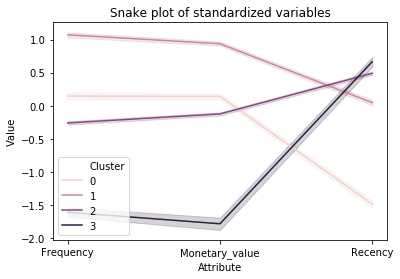

In [123]:
# Melt The Data
df_melt = pd.melt(df_norm.reset_index(),
                      id_vars=['customer_id', 'Cluster'],
                      value_vars=['Recency','Frequency','Monetary_value'],
                      var_name='Attribute',
                      value_name='Value')
df_melt.head()

# Visualize it
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data = df_melt)

##### *Observations:*

- We observe that **Cluster 1** is frequent, spend more, and they buy the product recently. Therefore, it could be the cluster   of a **Platinum Customer**.
- **Cluster 0** is more frequent than Cluster 1, its Monetary Value is also very high but the purchases made here are not that   much recent.They can be classified as **Gold Customers**.
- **Cluster 2** has the customers which are less frequent in purchases than both the Cluster 0 and Cluster 1, their transaction   values are also low from those clusters. Also, they have not done any purchases recently.They are **Silver Customers**.
- **Cluster 3** has the customers whose purchases are very less frequent, they also spend very less. Moreover, they have made     purchase long time ago. Therefore, it could be the cluster of **Lost Customers**.

In [124]:
 rfmTable.iloc[:,[0,1,2]].head()

Recency  Frequency  Monetary_value
customer_id                                    
1                  7         11         3018.09
2                128          3         2226.26
4                195          4          441.14
5                 16          6         2394.94
6                 64         10         7893.10

In [125]:
## Relative importance of segment attributes
cluster_avg = rfmTable.iloc[:,[0,1,2,9]].groupby(['ClusterNum']).mean()
pop_avg = rfmTable.iloc[:,[0,1,2]].mean()
relative_imp = cluster_avg / pop_avg - 1
relative_imp.round(2)

Recency  Frequency  Monetary_value
ClusterNum                                    
0             -0.87       0.00           -0.02
1             -0.21       0.65            0.78
2              0.29      -0.22           -0.24
3              0.87      -0.61           -0.76

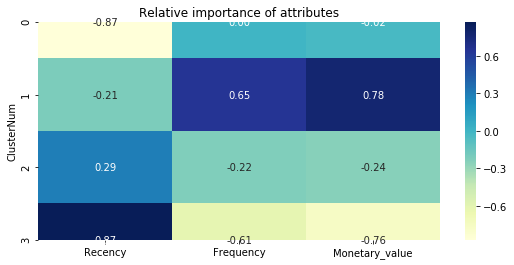

In [126]:
## Plotting Relative importance:
plt.figure(figsize=(9, 4))
plt.title('Relative importance of attributes')
sns.heatmap(data = relative_imp,  cmap = "YlGnBu", annot = True, fmt = '.2f')

#### *Label Encoding the Categorical Column in Old Customers data:*

In [127]:
## Creating an instance
LE = LabelEncoder()

## Label Encoding the categorical columns
df_final1['brand_enc'] = LE.fit_transform(df_final1['brand'].astype(str))
df_final1['product_line_enc'] = LE.fit_transform(df_final1['product_line'].astype(str))
df_final1['product_class_enc'] = LE.fit_transform(df_final1['product_class'].astype(str))
df_final1['product_size_enc'] = LE.fit_transform(df_final1['product_size'].astype(str))
df_final1['gender_enc'] = LE.fit_transform(df_final1['gender'].astype(str))
df_final1['job_industry_category_enc'] = LE.fit_transform(df_final1['job_industry_category'].astype(str))
df_final1['wealth_segment_enc'] = LE.fit_transform(df_final1['wealth_segment'].astype(str))
df_final1['state_enc'] = LE.fit_transform(df_final1['state'].astype(str))
df_final1['RA_NAME_2016_enc'] = LE.fit_transform(df_final1['RA_NAME_2016'].astype(str))
df_final1['Month_enc'] = LE.fit_transform(df_final1['Month'].astype(str))
df_final1['Loyalty_enc'] = LE.fit_transform(df_final1['Loyalty'].astype(str))

df_final1.head()

product_id  customer_id           brand product_line product_class  \
0          23            1  Norco Bicycles     Mountain           low   
1          11            1  Giant Bicycles     Standard          high   
2           9            1      OHM Cycles         Road        medium   
3          47            1   Trek Bicycles         Road           low   
4           2            1           Solex     Standard        medium   

  product_size  Profit Recency_x  gender  past_3_years_bike_related_purchases  \
0        small   75.75  278 days  Female                                   93   
1       medium  509.97  276 days  Female                                   93   
2       medium   75.14   21 days  Female                                   93   
3        small  189.28  233 days  Female                                   93   
4       medium   17.87  312 days  Female                                   93   

   ... product_line_enc product_class_enc  product_size_enc  gender_enc  \
0  ...                0                 1                 2           0   
1  ...                2                 0                 1           0   
2  ...                1                 2                 1           0   
3  ...                1                 1                 2           0   
4  ...                2                 2                 1           0   

   job_industry_category_enc wealth_segment_enc  state_enc RA_NAME_2016_enc  \
0                          3                  2          0                1   
1                          3                  2          0                1   
2                          3                  2          0                1   
3                          3                  2          0                1   
4                          3                  2          0                1   

   Month_enc  Loyalty_enc  
0          7            1  
1          7            1  
2          2            1  
3          8            1  
4          3            1  

[5 rows x 42 columns]

#### *Label Encoding the Categorical Column in New Customers data:*

In [128]:
## Creating an instance
le = LabelEncoder()

## Label Encoding the categorical columns
new_cus1['gender_enc'] = le.fit_transform(new_cus1['gender'].astype(str))
new_cus1['job_industry_category_enc'] = le.fit_transform(new_cus1['job_industry_category'].astype(str))
new_cus1['wealth_segment_enc'] = le.fit_transform(new_cus1['wealth_segment'].astype(str))
new_cus1['state_enc'] = le.fit_transform(new_cus1['state'].astype(str))
new_cus1['RA_NAME_2016_enc'] = le.fit_transform(new_cus1['RA_NAME_2016'].astype(str))
new_cus1['owns_car_enc'] = le.fit_transform(new_cus1['owns_car'].astype(str))

new_cus1.head()

first_name last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie   Brister    Male                                   86   
1      Peria  Rantoull  Female                                    3   
2    Madison      Lars    Male                                   11   
3     Andrea    Pendle  Female                                   86   
4   Philbert     Bangs    Male                                   67   

                  job_title job_industry_category  wealth_segment owns_car  \
0           General Manager         Manufacturing   Mass Customer      Yes   
1         Financial Analyst    Financial Services   Mass Customer       No   
2          Health Coach III                Health   Mass Customer       No   
3       Associate Professor    Financial Services  High Net Worth      Yes   
4  Environmental Specialist                    IT   Mass Customer      Yes   

   tenure                  address  ... RA_CODE_2016  \
0      14         45 Shopko Center  ...         30.0   
1       4     8350 Moulton Terrace  ...         30.0   
2      19   9503 New Castle Street  ...         30.0   
3      13  31281 Meadow Valley Way  ...         30.0   
4       6        02643 Moose Court  ...         30.0   

                RA_NAME_2016  RATIO  PERCENTAGE  gender_enc  \
0  Major Cities of Australia    1.0       100.0           1   
1  Major Cities of Australia    1.0       100.0           0   
2  Major Cities of Australia    1.0       100.0           1   
3  Major Cities of Australia    1.0       100.0           0   
4  Major Cities of Australia    1.0       100.0           1   

  job_industry_category_enc  wealth_segment_enc  state_enc RA_NAME_2016_enc  \
0                         5                   2          1                1   
1                         2                   2          1                1   
2                         3                   2          1                1   
3                         2                   1          1                1   
4                         4                   2          1                1   

   owns_car_enc  
0             1  
1             0  
2             0  
3             1  
4             1  

[5 rows x 27 columns]

### *Fitting an OLS Model for Estimating the Profit of New Customers:*

In [129]:
## Fitting an OLS Model using following features:

## We will formulate the Null Hypothesis as- H0: Regression Model is not significant
x_cols = ['brand_enc', 'product_line_enc', 'product_class_enc','product_size_enc', 'gender_enc',
          'past_3_years_bike_related_purchases', 'job_industry_category_enc','wealth_segment_enc', 'owns_car',
          'tenure', 'age', 'state_enc', 'RA_CODE_2016','RA_NAME_2016_enc', 'RATIO', 'PERCENTAGE', 'Month_enc']

## Separating out the Dependent varible:
y = df_final1["Profit"]

## Defining a function to get the fitted model:
def get_stats():
    x = df_final1[x_cols]
    results = sm.OLS(y,x).fit()
    print(results.summary())

get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 Profit   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.704
Method:                 Least Squares   F-statistic:                              3380.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        19:00:49   Log-Likelihood:                     -1.7905e+05
No. Observations:               24137   AIC:                                  3.581e+05
Df Residuals:                   24120   BIC:                                  3.583e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

For the variable 'Month', p value ( 0.625) > alpha (0.05). Hence, this variable is statistically insignificant. So, we remove this variable.

In [130]:
## Remove 'Month' variable
x_cols.remove('Month_enc')
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 Profit   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.704
Method:                 Least Squares   F-statistic:                              3591.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        19:00:51   Log-Likelihood:                     -1.7905e+05
No. Observations:               24137   AIC:                                  3.581e+05
Df Residuals:                   24121   BIC:                                  3.583e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

For the variable 'PERCENTAGE', p value (0.344) > alpha (0.05). Hence, this variable is statistically insignificant. So, we remove this variable.

In [131]:
## Removing 'PERCENTAGE' variable
x_cols.remove('PERCENTAGE')
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 Profit   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.704
Method:                 Least Squares   F-statistic:                              3830.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        19:00:53   Log-Likelihood:                     -1.7905e+05
No. Observations:               24137   AIC:                                  3.581e+05
Df Residuals:                   24122   BIC:                                  3.582e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

For the variable 'state', p-value (0.254) > alpha (0.05). Hence, this variable is statistically insignificant. So, we remove this variable.

In [132]:
## Remove 'state' variable
x_cols.remove('state_enc')
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 Profit   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.704
Method:                 Least Squares   F-statistic:                              4104.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        19:00:54   Log-Likelihood:                     -1.7905e+05
No. Observations:               24137   AIC:                                  3.581e+05
Df Residuals:                   24123   BIC:                                  3.582e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

For the variable 'tenure', p value (0.105) > alpha (0.05). Hence, this variable is statistically insignificant. So, we remove this variable.

In [133]:
## Remove 'tenure' variable
x_cols.remove('tenure')
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 Profit   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.704
Method:                 Least Squares   F-statistic:                              4419.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        19:00:55   Log-Likelihood:                     -1.7905e+05
No. Observations:               24137   AIC:                                  3.581e+05
Df Residuals:                   24124   BIC:                                  3.582e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

Hence, the fitted regression model will be-   
Estimated(y) = 66.0549x1 + 214.4451x2 + 86.1301x3 - 322.9038x4 + 16.9323x5 + 0.4298x6 + 3.4631x7 + 8.7845x8 + 18.8274x9 +                      0.8500x10 + 1.2000x11 + 8.7992x12 + 35.3165x13

In [134]:
## Remove 'brand', 'product_line', 'product_class', 'product_size' variables
x_cols.remove('brand_enc')
x_cols.remove('product_line_enc')
x_cols.remove('product_class_enc')
x_cols.remove('product_size_enc')
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 Profit   R-squared (uncentered):                   0.542
Model:                            OLS   Adj. R-squared (uncentered):              0.542
Method:                 Least Squares   F-statistic:                              3174.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        19:00:57   Log-Likelihood:                     -1.8433e+05
No. Observations:               24137   AIC:                                  3.687e+05
Df Residuals:                   24128   BIC:                                  3.687e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

New Customer list doesn't have some variables (x1, x2, x3 and x4)
So, the new fitted model will be -  
Estimated(y) = 35.4192x1 + 1.0852x2 + 17.4636x3 + 25.5137x4 + 41.0449x5 + 3.6201x6 + 3.4935x7 +  32.2056x8 + 111.2117x9

Here, (x1, x2, x3, x4, x5, x6, x7, x8, x9) = ('gender', 'past_3_years_bike_related_purchases', 'job_industry_category',
                                               'wealth_segment','owns_car', 'age', 'RA_CODE_2016', 'RA_NAME_2016', 'RATIO')

In [135]:
## Defining a function to estimate the profit of New Customers
def estimated_profit_new(a, b, c, d, e, f, g, h, i):
    return ((35.4192*a) + (1.0852*b) + (17.4636*c) + (25.5137*d) + 
            (41.0449*e) + (3.6201*f) + (3.4935*g) + (32.2056*h) + (111.2117*i))
    
new_cus_profit = new_cus1.loc[:,['first_name', 'last_name', 'gender','past_3_years_bike_related_purchases',
                                 'job_industry_category','wealth_segment', 'owns_car', 'tenure','address', 'postcode', 'state',
                                 'property_valuation', 'Rank', 'age', 'age_group', 'RA_CODE_2016', 'RA_NAME_2016', 'RATIO',
                                 'PERCENTAGE', 'gender_enc', 'job_industry_category_enc', 'wealth_segment_enc', 'state_enc',
                                 'RA_NAME_2016_enc', 'owns_car_enc']]

## Adding 'Profit' column to the New Customers list
new_cus_profit['Profit'] = new_cus_profit.apply(lambda x: estimated_profit_new(x['gender_enc'],
                                                                               x['past_3_years_bike_related_purchases'],
                                                                               x['job_industry_category_enc'], 
                                                                               x['wealth_segment_enc'], x['owns_car_enc'],
                                                                               x['age'], x['RA_CODE_2016'], 
                                                                               x['RA_NAME_2016_enc'], x['RATIO']),axis=1)
new_cus_profit.head()

first_name last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie   Brister    Male                                   86   
1      Peria  Rantoull  Female                                    3   
2    Madison      Lars    Male                                   11   
3     Andrea    Pendle  Female                                   86   
4   Philbert     Bangs    Male                                   67   

  job_industry_category  wealth_segment owns_car  tenure  \
0         Manufacturing   Mass Customer      Yes      14   
1    Financial Services   Mass Customer       No       4   
2                Health   Mass Customer       No      19   
3    Financial Services  High Net Worth      Yes      13   
4                    IT   Mass Customer      Yes       6   

                   address postcode  ...               RA_NAME_2016  RATIO  \
0         45 Shopko Center     4500  ...  Major Cities of Australia    1.0   
1     8350 Moulton Terrace     4500  ...  Major Cities of Australia    1.0   
2   9503 New Castle Street     4500  ...  Major Cities of Australia    1.0   
3  31281 Meadow Valley Way     4500  ...  Major Cities of Australia    1.0   
4        02643 Moose Court     4500  ...  Major Cities of Australia    1.0   

   PERCENTAGE  gender_enc job_industry_category_enc  wealth_segment_enc  \
0       100.0           1                         5                   2   
1       100.0           0                         2                   2   
2       100.0           1                         3                   2   
3       100.0           0                         2                   1   
4       100.0           1                         4                   2   

  state_enc  RA_NAME_2016_enc  owns_car_enc    Profit  
0         1                 1             1  788.0454  
1         1                 1             0  507.5772  
2         1                 1             0  598.1024  
3         1                 1             1  743.5036  
4         1                 1             1  721.0022  

[5 rows x 26 columns]

In [152]:
new_cus1.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'address', 'postcode', 'state', 'property_valuation', 'Rank', 'age',
       'age_group', 'POSTCODE_2017.1', 'RA_CODE_2016', 'RA_NAME_2016', 'RATIO',
       'PERCENTAGE', 'gender_enc', 'job_industry_category_enc',
       'wealth_segment_enc', 'state_enc', 'RA_NAME_2016_enc', 'owns_car_enc'],
      dtype='object')

In [136]:
## Saving the file in CSV Format
new_cus_profit_clean = new_cus_profit.loc[:,['first_name', 'last_name', 'gender','past_3_years_bike_related_purchases',
                                             'job_industry_category','wealth_segment', 'owns_car', 'tenure','address',
                                             'postcode', 'state','property_valuation', 'Rank', 'age', 'age_group', 
                                             'RA_CODE_2016', 'RA_NAME_2016', 'RATIO','PERCENTAGE','Profit']]

new_cus_profit_clean.to_csv(r"C:\Users\dhrit\OneDrive\Desktop\Dhriti\KPMG_Module-2\New_CustomersProfit.csv")

### *Fitting a Linear Regression Model using Sklearn Library:*

In [137]:
x_cols = ['gender_enc', 'past_3_years_bike_related_purchases','job_industry_category_enc','wealth_segment_enc', 'owns_car', 
          'age', 'RA_CODE_2016','RA_NAME_2016_enc', 'RATIO']

X_train, X_test, y_train, y_test = train_test_split(df_final1[x_cols],df_final1['Profit'], test_size=0.30,random_state=101)

## Creating an instance for model
model = LinearRegression()

## Fitted model
model.fit(X_train,y_train) 

## Predicted model
Y_pred = model.predict(X_test)

## Printing predicted model
Y_pred

<IPython.core.display.Javascript object>

array([569.48340119, 526.80852506, 537.76250283, ..., 548.21352754,
       537.76250283, 554.28379542])

In [138]:
from sklearn import metrics

## Printing Mean Squared Error
print("Mean squared error is : ",metrics.mean_squared_error(y_test, Y_pred))

## Printing Model Weights
print("Weights: ",model.coef_)

## Printing Model Intercept
print("Intercept: ", model.intercept_)

Mean squared error is :  247674.37166028147
Weights:  [ 4.26862140e+00  2.76752338e-01  1.35247978e+00  7.81718604e-04
  1.14651351e+01 -1.87234388e-01  4.47829139e-01  6.46253167e+00
  9.16585862e+00]
Intercept:  509.27205589097713


In [139]:
print("Mean absolute error is : ",metrics.mean_absolute_error(y_test,Y_pred))

print("Mean squared error is : ",metrics.mean_squared_error(y_test,Y_pred))

print("Root Mean squared error is : ",np.sqrt(metrics.mean_squared_error(y_test,Y_pred)))

Mean absolute error is :  418.2013414625412
Mean squared error is :  247674.37166028147
Root Mean squared error is :  497.66893780934475


In [140]:
## Predicted model
new_cus_pred = model.predict(new_cus1.loc[:,['gender_enc','past_3_years_bike_related_purchases', 'job_industry_category_enc',
       'wealth_segment_enc', 'owns_car_enc', 'age','RA_CODE_2016',
       'RA_NAME_2016_enc','RATIO']])

new_cus_pred

array([572.65073942, 533.07208412, 539.4093289 , ..., 544.45206453,
       550.70256601, 552.1589972 ])

In [141]:
## Defining a function to estimate the profit of New Customers
def estimated_profit_new1(a, b, c, d, e, f, g, h, i):
    return (509.5352 + (4.26951950e+00*a) + (2.76673212e-01*b) + (1.35262790e+00*c) + (1.57988098e-03*d) + 
            (1.14640771e+01*e) + (-1.93377788e-01*f) + (4.47752820e-01*g) + (6.46219729e+00*h) + (9.17161192e+00*i))
    
new_cus_profit1 = new_cus1.loc[:,['first_name', 'last_name', 'gender','past_3_years_bike_related_purchases',
                                 'job_industry_category','wealth_segment', 'owns_car', 'tenure','address', 'postcode', 'state',
                                 'property_valuation', 'Rank', 'age', 'age_group', 'RA_CODE_2016', 'RA_NAME_2016', 'RATIO',
                                 'PERCENTAGE', 'gender_enc', 'job_industry_category_enc', 'wealth_segment_enc', 'state_enc',
                                 'RA_NAME_2016_enc', 'owns_car_enc']]

## Adding Profit column to the New Customers list
new_cus_profit1['Profit'] = new_cus_profit1.apply(lambda x: estimated_profit_new1(x['gender_enc'],
                                                                               x['past_3_years_bike_related_purchases'],
                                                                               x['job_industry_category_enc'], 
                                                                               x['wealth_segment_enc'], x['owns_car_enc'],
                                                                               x['age'], x['RA_CODE_2016'], 
                                                                               x['RA_NAME_2016_enc'], x['RATIO']),axis=1)
new_cus_profit1.head()

first_name last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie   Brister    Male                                   86   
1      Peria  Rantoull  Female                                    3   
2    Madison      Lars    Male                                   11   
3     Andrea    Pendle  Female                                   86   
4   Philbert     Bangs    Male                                   67   

  job_industry_category  wealth_segment owns_car  tenure  \
0         Manufacturing   Mass Customer      Yes      14   
1    Financial Services   Mass Customer       No       4   
2                Health   Mass Customer       No      19   
3    Financial Services  High Net Worth      Yes      13   
4                    IT   Mass Customer      Yes       6   

                   address postcode  ...               RA_NAME_2016  RATIO  \
0         45 Shopko Center     4500  ...  Major Cities of Australia    1.0   
1     8350 Moulton Terrace     4500  ...  Major Cities of Australia    1.0   
2   9503 New Castle Street     4500  ...  Major Cities of Australia    1.0   
3  31281 Meadow Valley Way     4500  ...  Major Cities of Australia    1.0   
4        02643 Moose Court     4500  ...  Major Cities of Australia    1.0   

   PERCENTAGE  gender_enc job_industry_category_enc  wealth_segment_enc  \
0       100.0           1                         5                   2   
1       100.0           0                         2                   2   
2       100.0           1                         3                   2   
3       100.0           0                         2                   1   
4       100.0           1                         4                   2   

  state_enc  RA_NAME_2016_enc  owns_car_enc      Profit  
0         1                 1             1  572.519207  
1         1                 1             0  533.051273  
2         1                 1             0  539.339784  
3         1                 1             1  560.516046  
4         1                 1             1  567.456811  

[5 rows x 26 columns]

In [142]:
## Saving the file in CSV Format
new_cus_profit1_clean = new_cus_profit1.loc[:,['first_name', 'last_name', 'gender','past_3_years_bike_related_purchases',
                                 'job_industry_category','wealth_segment', 'owns_car', 'tenure','address', 'postcode', 'state',
                                 'property_valuation', 'Rank', 'age', 'age_group', 'RA_CODE_2016', 'RA_NAME_2016', 'RATIO',
                                 'PERCENTAGE','Profit']]

new_cus_profit1_clean.to_csv(r"C:\Users\dhrit\OneDrive\Desktop\Dhriti\KPMG_Module-2\NewCustomers_ProfitLinear.csv")

### *Classifying the NEW Customers in different Loyalty Levels using KNN Algorithm:*

In [143]:
x_cols = ['gender_enc', 'past_3_years_bike_related_purchases','job_industry_category_enc','wealth_segment_enc', 'owns_car', 
          'age','RA_CODE_2016','RA_NAME_2016_enc']

X_train, X_test, y_train, y_test = train_test_split(df_final1[x_cols],df_final1['Loyalty_enc'], test_size=0.30,random_state=101)

In [144]:
math.sqrt(len(y_test))

85.09994124557313

In [147]:
classifier = KNeighborsClassifier(n_neighbors=85, p=2, metric='euclidean')
classifier.fit(X_train,y_train) #Fitted model
Y_predicted = classifier.predict(X_test)#Predicted model
Y_predicted

array([3, 3, 3, ..., 2, 3, 3])

In [148]:
## Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, Y_predicted))
print('\nClassification Report:\n', classification_report(y_test, Y_predicted))
print('\nAccuracy Score:\n', accuracy_score(y_test, Y_predicted))

Confusion Matrix:
 [[1056   46  248  728]
 [ 268   52  156  455]
 [ 423   46  367  806]
 [ 554   46  273 1718]]

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.51      0.48      2078
           1       0.27      0.06      0.09       931
           2       0.35      0.22      0.27      1642
           3       0.46      0.66      0.55      2591

    accuracy                           0.44      7242
   macro avg       0.39      0.36      0.35      7242
weighted avg       0.41      0.44      0.41      7242


Accuracy Score:
 0.4409003037834852


In [149]:
## Extracting relevant columns
new_cus_classified = new_cus1.loc[:,['first_name', 'last_name', 'gender','past_3_years_bike_related_purchases',
                                 'job_industry_category','wealth_segment', 'owns_car', 'tenure','address', 'postcode', 'state',
                                 'property_valuation', 'Rank', 'age', 'age_group', 'RA_CODE_2016', 'RA_NAME_2016', 'RATIO',
                                 'PERCENTAGE', 'gender_enc', 'job_industry_category_enc', 'wealth_segment_enc', 'state_enc',
                                 'RA_NAME_2016_enc', 'owns_car_enc']]

## Adding Loyalty column to the New Customers list
new_cus_classified['Loyalty'] = classifier.predict(new_cus_classified.loc[:,['gender_enc', 
                                                                             'past_3_years_bike_related_purchases',
                                                                             'job_industry_category_enc',
                                                                             'wealth_segment_enc', 
                                                                             'owns_car_enc', 'age', 'RA_CODE_2016',
                                                                            'RA_NAME_2016_enc']])                                     
## Print the head
new_cus_classified.head()

first_name last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie   Brister    Male                                   86   
1      Peria  Rantoull  Female                                    3   
2    Madison      Lars    Male                                   11   
3     Andrea    Pendle  Female                                   86   
4   Philbert     Bangs    Male                                   67   

  job_industry_category  wealth_segment owns_car  tenure  \
0         Manufacturing   Mass Customer      Yes      14   
1    Financial Services   Mass Customer       No       4   
2                Health   Mass Customer       No      19   
3    Financial Services  High Net Worth      Yes      13   
4                    IT   Mass Customer      Yes       6   

                   address postcode  ...               RA_NAME_2016  RATIO  \
0         45 Shopko Center     4500  ...  Major Cities of Australia    1.0   
1     8350 Moulton Terrace     4500  ...  Major Cities of Australia    1.0   
2   9503 New Castle Street     4500  ...  Major Cities of Australia    1.0   
3  31281 Meadow Valley Way     4500  ...  Major Cities of Australia    1.0   
4        02643 Moose Court     4500  ...  Major Cities of Australia    1.0   

   PERCENTAGE  gender_enc job_industry_category_enc  wealth_segment_enc  \
0       100.0           1                         5                   2   
1       100.0           0                         2                   2   
2       100.0           1                         3                   2   
3       100.0           0                         2                   1   
4       100.0           1                         4                   2   

  state_enc  RA_NAME_2016_enc  owns_car_enc  Loyalty  
0         1                 1             1        3  
1         1                 1             0        0  
2         1                 1             0        1  
3         1                 1             1        3  
4         1                 1             1        3  

[5 rows x 26 columns]

In [150]:
## Top 20 customers according to this algorithm
new_cus_classified[new_cus_classified['Loyalty']==2].head(20)

first_name    last_name  gender  past_3_years_bike_related_purchases  \
16    Rutledge        Hallt    Male                                   23   
17    Rutledge        Hallt    Male                                   23   
28       Lolly       Prewer  Female                                   44   
29       Lolly       Prewer  Female                                   44   
44       Debby    Balmadier  Female                                   53   
45       Debby    Balmadier  Female                                   53   
60   Simonette        Borsi  Female                                    4   
66     Beverly      Domnick  Female                                   56   
67     Beverly      Domnick  Female                                   56   
82      Gaston    Dallaghan    Male                                   44   
84    Tabbatha      Averill  Female                                    5   
92       Dyane      Burwell  Female                                   19   
93       Dyane      Burwell  Female                                   19   
94    Vladimir  Westmerland    Male                                   18   
95    Vladimir  Westmerland    Male                                   18   
96       Milty   Brauninger    Male                                   13   
125       Kort       Disley    Male                                   66   
145    Corinna       Suggey  Female                                   52   
162    Thaxter    Kingsbury    Male                                   12   
164    Marinna     Kauschke  Female                                   21   

    job_industry_category     wealth_segment owns_car  tenure  \
16     Financial Services      Mass Customer       No       8   
17     Financial Services      Mass Customer       No       8   
28                 Health      Mass Customer       No      15   
29                 Health      Mass Customer       No      15   
44     Financial Services  Affluent Customer      Yes       5   
45     Financial Services  Affluent Customer      Yes       5   
60          Manufacturing  Affluent Customer      Yes       6   
66                     IT      Mass Customer       No       9   
67                     IT      Mass Customer       No       9   
82     Financial Services      Mass Customer      Yes       8   
84     Financial Services  Affluent Customer      Yes      13   
92                 Retail      Mass Customer      Yes       7   
93                 Retail      Mass Customer      Yes       7   
94          Manufacturing      Mass Customer      Yes      18   
95          Manufacturing      Mass Customer      Yes      18   
96     Financial Services     High Net Worth       No      11   
125                Health      Mass Customer      Yes       7   
145    Financial Services  Affluent Customer       No       9   
162           Argiculture      Mass Customer       No      20   
164    Financial Services  Affluent Customer      Yes       8   

                       address postcode  ...               RA_NAME_2016  \
16           7 Nevada Crossing     2620  ...  Major Cities of Australia   
17           7 Nevada Crossing     2620  ...   Inner Regional Australia   
28         694 Coolidge Center     2620  ...  Major Cities of Australia   
29         694 Coolidge Center     2620  ...   Inner Regional Australia   
44           738 Spaight Drive     3216  ...  Major Cities of Australia   
45           738 Spaight Drive     3216  ...   Inner Regional Australia   
60            66 Hoffman Court     2232  ...  Major Cities of Australia   
66     8 Burning Wood Junction     2232  ...  Major Cities of Australia   
67     8 Burning Wood Junction     2232  ...   Inner Regional Australia   
82           656 Fuller Street     2783  ...  Major Cities of Australia   
84             663 8th Parkway     2257  ...  Major Cities of Australia   
92             51 Hooker Court     2640  ...   Inner Regional Australia   
93             51 Hooker Court     2640  ...   Outer Regional Aust

In [151]:
## Renaming the Loyalty column labels
new_cus_classified['Loyalty'].replace(0,'Bronze', inplace = True)
new_cus_classified['Loyalty'].replace(1,'Gold', inplace = True)
new_cus_classified['Loyalty'].replace(2,'Platinum', inplace = True)
new_cus_classified['Loyalty'].replace(3,'Silver', inplace = True)

## Saving the file in CSV Format
new_cus_classified_clean = new_cus_classified.loc[:,['first_name', 'last_name', 'gender','past_3_years_bike_related_purchases',
                                                     'job_industry_category','wealth_segment', 'owns_car', 'tenure','address',
                                                     'postcode', 'state','property_valuation', 'Rank', 'age', 'age_group',
                                                     'RA_CODE_2016', 'RA_NAME_2016', 'RATIO','PERCENTAGE','Loyalty']]

new_cus_classified_clean.to_csv(r"C:\Users\dhrit\OneDrive\Desktop\Dhriti\KPMG_Module-2\NewCustomers_knn.csv")

### *Classifying New Customers on the basis of Decision Tree Algorithm:*

In [152]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Predicted",y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Predicted [3 0 0 ... 1 0 2]
Accuracy: 0.9877105771886219


In [153]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2074    4    0    0]
 [   0  920    6    5]
 [  14   16 1584   28]
 [   5    7    4 2575]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2078
           1       0.97      0.99      0.98       931
           2       0.99      0.96      0.98      1642
           3       0.99      0.99      0.99      2591

    accuracy                           0.99      7242
   macro avg       0.99      0.99      0.99      7242
weighted avg       0.99      0.99      0.99      7242



In [154]:
new_cus_decision = new_cus1.loc[:,['first_name', 'last_name', 'gender','past_3_years_bike_related_purchases',
                                 'job_industry_category','wealth_segment', 'owns_car', 'tenure','address', 'postcode', 'state',
                                 'property_valuation', 'Rank', 'age', 'age_group', 'RA_CODE_2016', 'RA_NAME_2016', 'RATIO',
                                 'PERCENTAGE', 'gender_enc', 'job_industry_category_enc', 'wealth_segment_enc', 'state_enc',
                                 'RA_NAME_2016_enc', 'owns_car_enc']]

## Adding Loyalty column to New Customers List
new_cus_decision['Loyalty'] = clf.predict(new_cus_decision.loc[:,['gender_enc','past_3_years_bike_related_purchases',
                                                                  'job_industry_category_enc','wealth_segment_enc', 
                                                                  'owns_car_enc', 'age', 'RA_CODE_2016',
                                                                   'RA_NAME_2016_enc']])                                     
## Printing New Customers List
new_cus_decision.head()

first_name last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie   Brister    Male                                   86   
1      Peria  Rantoull  Female                                    3   
2    Madison      Lars    Male                                   11   
3     Andrea    Pendle  Female                                   86   
4   Philbert     Bangs    Male                                   67   

  job_industry_category  wealth_segment owns_car  tenure  \
0         Manufacturing   Mass Customer      Yes      14   
1    Financial Services   Mass Customer       No       4   
2                Health   Mass Customer       No      19   
3    Financial Services  High Net Worth      Yes      13   
4                    IT   Mass Customer      Yes       6   

                   address postcode  ...               RA_NAME_2016  RATIO  \
0         45 Shopko Center     4500  ...  Major Cities of Australia    1.0   
1     8350 Moulton Terrace     4500  ...  Major Cities of Australia    1.0   
2   9503 New Castle Street     4500  ...  Major Cities of Australia    1.0   
3  31281 Meadow Valley Way     4500  ...  Major Cities of Australia    1.0   
4        02643 Moose Court     4500  ...  Major Cities of Australia    1.0   

   PERCENTAGE  gender_enc job_industry_category_enc  wealth_segment_enc  \
0       100.0           1                         5                   2   
1       100.0           0                         2                   2   
2       100.0           1                         3                   2   
3       100.0           0                         2                   1   
4       100.0           1                         4                   2   

  state_enc  RA_NAME_2016_enc  owns_car_enc  Loyalty  
0         1                 1             1        3  
1         1                 1             0        3  
2         1                 1             0        2  
3         1                 1             1        2  
4         1                 1             1        1  

[5 rows x 26 columns]

In [155]:
## Top 20 customers according to this algorithm
new_cus_decision[new_cus_decision['Loyalty']==2].head(20)

first_name  last_name  gender  past_3_years_bike_related_purchases  \
2      Madison       Lars    Male                                   11   
3       Andrea     Pendle  Female                                   86   
5        Morly     Genery    Male                                   69   
7       Lucine      Stutt  Female                                   64   
10     Melinda     Hadlee  Female                                   34   
12     Micheil     Fleote    Male                                   48   
16    Rutledge      Hallt    Male                                   23   
20     Sybilla    MacCart  Female                                   88   
24      Renate      Whyte  Female                                   60   
28       Lolly     Prewer  Female                                   44   
29       Lolly     Prewer  Female                                   44   
34      Kissie       Line  Female                                    2   
35   Ferdinand  Romanetti    Male                                   60   
52      Odessa  Mc Andrew  Female                                   97   
62     Deirdre   Sturgeon  Female                                   11   
66     Beverly    Domnick  Female                                   56   
69     Zabrina    Margram  Female                                   87   
71      Cobbie    Bruyett    Male                                   20   
75  Fitzgerald   Hellikes    Male                                   25   
81    Kellyann     Adshad  Female                                   62   

   job_industry_category     wealth_segment owns_car  tenure  \
2                 Health      Mass Customer       No      19   
3     Financial Services     High Net Worth      Yes      13   
5               Property      Mass Customer       No      16   
7          Manufacturing  Affluent Customer      Yes       5   
10    Financial Services  Affluent Customer       No      19   
12         Manufacturing     High Net Worth       No      16   
16    Financial Services      Mass Customer       No       8   
20    Financial Services      Mass Customer      Yes       7   
24                Health     High Net Worth      Yes      15   
28                Health      Mass Customer       No      15   
29                Health      Mass Customer       No      15   
34         Manufacturing  Affluent Customer      Yes       7   
35    Financial Services  Affluent Customer       No       9   
52              Property      Mass Customer       No       8   
62                Retail      Mass Customer      Yes       9   
66                    IT      Mass Customer       No       9   
69         Manufacturing     High Net Worth      Yes      11   
71    Financial Services      Mass Customer      Yes      20   
75                Health      Mass Customer      Yes      10   
81    Financial Services      Mass Customer      Yes      22   

                     address postcode  ...               RA_NAME_2016  \
2     9503 New Castle Street     4500  ...  Major Cities of Australia   
3    31281 Meadow Valley Way     4500  ...  Major Cities of Australia   
5          14 Mccormick Park     2113  ...  Major Cities of Australia   
7         207 Annamark Plaza     4814  ...   Outer Regional Australia   
10         115 Montana Place     2093  ...  Major Cities of Australia   
12   174 Lotheville Crossing     2093  ...  Major Cities of Australia   
16         7 Nevada Crossing     2620  ...  Major Cities of Australia   
20             74 Welch Pass     2620  ...  Major Cities of Australia   
24        4189 Laurel Center     2620  ...  Major Cities of Australia   
28       694 Coolidge Center     2620  ...  Major Cities of Australia   
29       694 Coolidge Center     2620  ...   Inner Regional Australia   
34    629 Grasskamp Junction     2200  ...  Major Cities of Australia   
35               2 Sloan Way     2200  ...  Major Cities of Australia   
52  31756 Meadow Valley Lane     2232  ...  Major Cities of Australia   
62       

In [156]:
## Renaming the Loyalty column labels
new_cus_decision['Loyalty'].replace(0,'Bronze', inplace = True)
new_cus_decision['Loyalty'].replace(1,'Gold', inplace = True)
new_cus_decision['Loyalty'].replace(2,'Platinum', inplace = True)
new_cus_decision['Loyalty'].replace(3,'Silver', inplace = True)

## Saving the file in CSV Format
new_cus_decision_clean = new_cus_decision.loc[:,['first_name', 'last_name', 'gender','past_3_years_bike_related_purchases',
                                                 'job_industry_category','wealth_segment', 'owns_car', 'tenure','address',
                                                 'postcode', 'state', 'property_valuation', 'Rank', 'age', 'age_group',
                                                 'RA_CODE_2016', 'RA_NAME_2016', 'RATIO', 'PERCENTAGE','Loyalty']]

new_cus_classified_clean.to_csv(r"C:\Users\dhrit\OneDrive\Desktop\Dhriti\KPMG_Module-2\NewCustomers_DTree.csv")

Text(0, 0.5, 'Age')

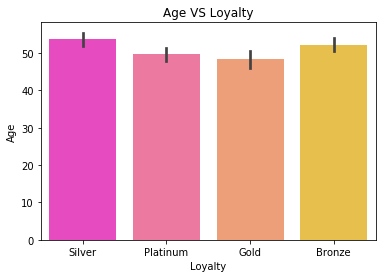

In [157]:
sns.barplot(x='Loyalty', y='age', data=new_cus_decision, palette = 'spring')
plt.title("Age VS Loyalty")
plt.xlabel("Loyalty")
plt.ylabel("Age")

Most valuable customers (Platinum) are the ones with age group below 50 years.


Text(0, 0.5, 'Frequency')

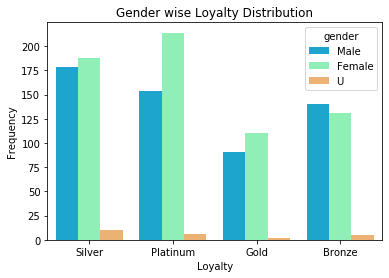

In [158]:
sns.countplot(x='Loyalty', hue='gender', data=new_cus_decision, palette = 'rainbow')
plt.title("Gender wise Loyalty Distribution")
plt.xlabel("Loyalty")
plt.ylabel("Frequency")

Females are the highly valuable customers of the company.

Text(0, 0.5, 'Past 3 years bike related purchases')

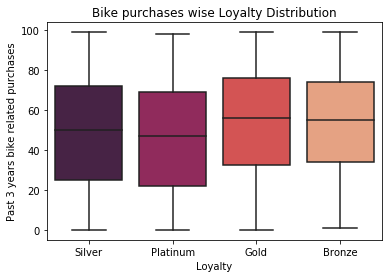

In [159]:
sns.boxplot(x='Loyalty', y='past_3_years_bike_related_purchases', data=new_cus_decision, palette = 'rocket')
plt.title("Bike purchases wise Loyalty Distribution")
plt.xlabel("Loyalty")
plt.ylabel("Past 3 years bike related purchases")

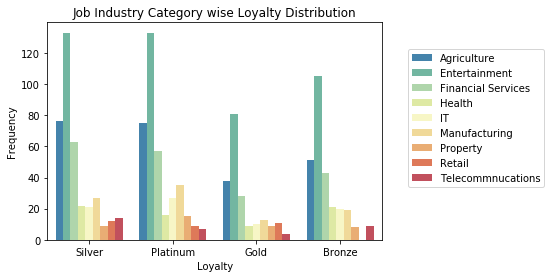

In [160]:
sns.countplot(x='Loyalty', hue='job_industry_category', data=new_cus_decision, palette = 'Spectral_r')
plt.title("Job Industry Category wise Loyalty Distribution")
plt.xlabel("Loyalty")
plt.ylabel("Frequency")
plt.legend(("Agriculture","Entertainment","Financial Services", "Health", "IT", "Manufacturing", "Property", "Retail",
            "Telecommnucations"), bbox_to_anchor = (1.5,0.9))

People working in Financial Services could be an asset to the company. This was also inferred from the fact that most of the new customers were employed in Finacial Services.

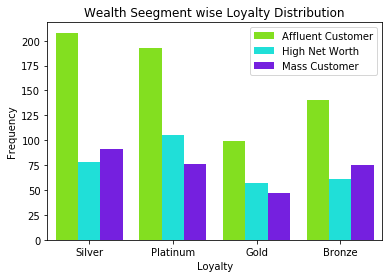

In [161]:
sns.countplot(x='Loyalty', hue='wealth_segment', data=new_cus_decision, palette = 'hsv')
plt.title("Wealth Seegment wise Loyalty Distribution")
plt.xlabel("Loyalty")
plt.ylabel("Frequency")
plt.legend(("Affluent Customer", "High Net Worth","Mass Customer"))

Mass Customers add most of the value to the company. 

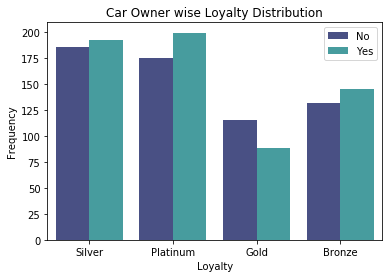

In [162]:
sns.countplot(x='Loyalty', hue='owns_car', data=new_cus_decision, palette = 'mako')
plt.title("Car Owner wise Loyalty Distribution")
plt.xlabel("Loyalty")
plt.ylabel("Frequency")
plt.legend(("No", "Yes"))

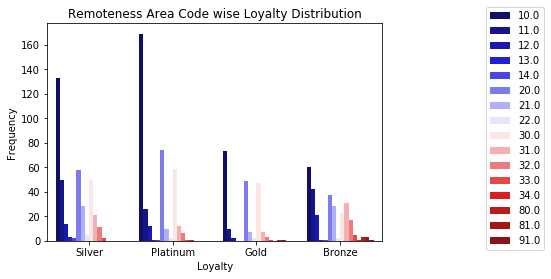

In [163]:
sns.countplot(x='Loyalty', hue='RA_CODE_2016', data=new_cus_decision, palette = 'seismic')
plt.title("Remoteness Area Code wise Loyalty Distribution")
plt.xlabel("Loyalty")
plt.ylabel("Frequency")
plt.legend(bbox_to_anchor = (1.5,1.1))

In [164]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(max_depth = 3)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf1.predict(X_test)
print("Predicted",y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Predicted [0 0 3 ... 3 3 3]
Accuracy: 0.3895332780999724


In [165]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 989    0    0 1089]
 [ 176    0    0  755]
 [ 222    0    0 1420]
 [ 759    0    0 1832]]
              precision    recall  f1-score   support

           0       0.46      0.48      0.47      2078
           1       0.00      0.00      0.00       931
           2       0.00      0.00      0.00      1642
           3       0.36      0.71      0.48      2591

    accuracy                           0.39      7242
   macro avg       0.21      0.30      0.24      7242
weighted avg       0.26      0.39      0.30      7242



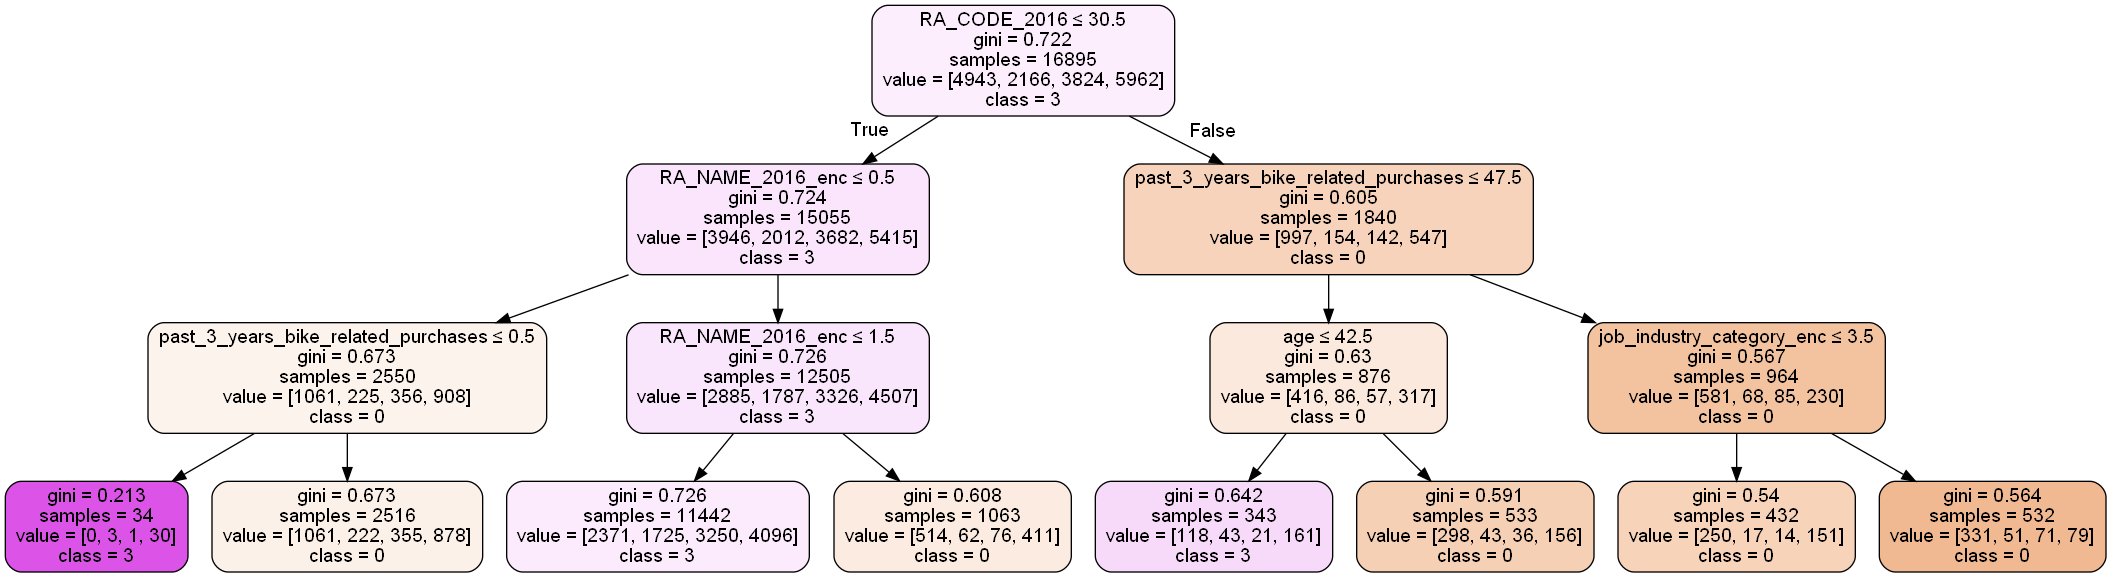

In [166]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
import six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_cols,class_names=['0','1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('image.png')
Image(graph.create_png())